# Produisez une étude de marché

# Scénario
Votre entreprise **d'agroalimentaire** souhaite se développer à l'international. Elle est spécialisée dans...
 le poulet !

L'international, oui, mais pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !

Votre objectif sera d'aider **à cibler plus particulièrement certains pays**, dans le but d'approfondir ensuite l'étude de marché. Plus particulièrement, l'idéal serait de produire des "groupes" de pays, plus ou moins gros, dont on connaît les caractéristiques.

Dans un premier temps, la stratégie est plutôt d'exporter les produits plutôt que de produire sur place, c'est-à-dire dans le(s) nouveau(x) pays ciblé(s).


Pour identifier les pays propices à une insertion dans le marché du poulet,
 Il vous a été demandé de cibler les pays. 
 Etudier les régimes alimentaires de chaque pays, notamment en termes de protéines d'origine animale et en termes de calories.


Construisez votre échantillon contenant l'ensemble des pays disponibles, chacun caractérisé par ces variables :

différence de population entre une année antérieure (au choix) et l'année courante, exprimée en pourcentage ;
proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays ;
disponibilité alimentaire en protéines par habitant ;
disponibilité alimentaire en calories par habitant.

Construisez un dendrogramme contenant l'ensemble des pays étudiés, puis coupez-le afin d'obtenir 5 groupes.

Caractérisez chacun de ces groupes selon les variables cités précédemment, et facultativement selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centroïdes de chacun des groupes, puis en les commentant et en les critiquant au vu de vos objectifs.

Donnez une courte liste de pays à cibler, en présentant leurs caractéristiques. Un découpage plus précis qu'en 5 groupes peut si besoin être effectué pour cibler un nombre raisonnable de pays. 

Visualisez vos  partitions dans le premier plan factoriel obtenu par ACP.

Dans votre partition, vous avez obtenu des groupes distincts. Vérifiez donc qu'ils diffèrent réellement. Pour cela, réalisez les tests statistiques suivants :

un test d'adéquation : parmi les 4 variables, ou parmi d'autres variables que vous trouverez pertinentes, trouvez une variable dont la loi est normale ;
un test de comparaison de deux populations (dans le cas gaussien) : choisissez 2 clusters parmi ceux que vous aurez déterminé. Sur ces 2 clusters, testez la variable gaussienne grâce à un test de comparaison.

In [90]:
# Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sklearn as sk
import scipy as sp
import pca as pca
from sklearn.cluster import KMeans
from sklearn import cluster


In [91]:
#Versions utilisées
print("Jupyter Notebook : " + str(pd.__version__))
print("Pandas : " + str(pd.__version__))
print("Numpy : " + str(np.__version__))
print("Seaborn : " + str(sns.__version__))

Jupyter Notebook : 1.2.4
Pandas : 1.2.4
Numpy : 1.20.1
Seaborn : 0.11.1


In [92]:
sns.set( # Styles Seaborn
    style='whitegrid',
    context='notebook',
    palette='Paired',
    rc={'figure.figsize':(8,5)})

In [93]:
# Couleurs
red_a400 = '#ff1744'
indigo_a100 = '#8c9eff'
indigo_a400 = '#3d5afe'
indigo_a700 = '#304ffe'
bluegrey_900 = '#263238'
teal_a400 = '#1de9b6'
purple_a400 = '#d500f9'
yellow_a400 = '#ffea00'
bluegrey_900 = '#263238'
palette_5 = [teal_a400, indigo_a400, red_a400, yellow_a400, purple_a400]

# Mission 1: Construisez un échantillon contenant l'ensemble des pays disponibles, chacun caractérisé par ces variables :\

différence de population entre une année antérieure (au choix) et l'année courante, exprimée en pourcentage ;\
proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays ;\
disponibilité alimentaire en protéines par habitant ;\
disponibilité alimentaire en calories par habitant.

# 1. Import des données

## 1.1 Import et traitement de la population par pays
la variation de la population entre 2013 et 2019, en %, qui sera positive en cas de croissance ou négative en cas de baisse démographique ;

Sources FAO (http://www.fao.org/faostat/fr/#data)

In [94]:
df_population = pd.read_csv('datas/fao-populations_2019- 2013.csv' , header=0, sep=",", decimal=".")
df_population.head(5)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,32269.589,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2019,2019,1000 personnes,38041.754,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,53687.121,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2019,2019,1000 personnes,58558.270,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,2903.790,X,Sources internationales sûres,NaN


In [95]:
df_population = df_population[['Code zone (FAO)', 'Zone', 'Produit', 'Année', 'Valeur']]
df_population['Valeur'] = df_population['Valeur']*1000
df_population.head()

,Code zone (FAO),Zone,Produit,Année,Valeur
0,2,Afghanistan,Population-Estimations,2013,32269589.0
1,2,Afghanistan,Population-Estimations,2019,38041754.0
2,202,Afrique du Sud,Population-Estimations,2013,53687121.0
3,202,Afrique du Sud,Population-Estimations,2019,58558270.0
4,3,Albanie,Population-Estimations,2013,2903790.0


In [96]:
df_population = df_population.pivot_table(index=['Code zone (FAO)', 'Zone'], columns='Année', values = 'Valeur', aggfunc = sum).reset_index()
df_population.head()

Année,Code zone (FAO),Zone,2013,2019
0,1,Arménie,2897588.0,2957731.0
1,2,Afghanistan,32269589.0,38041754.0
2,3,Albanie,2903790.0,2880917.0
3,4,Algérie,38140133.0,43053054.0
4,5,Samoa américaines,55713.0,55312.0


In [97]:
# différence de population entre 2013 et 2019, exprimée en pourcentage
df_population['Evolution population (%)'] = round(((df_population[2019]-df_population[2013])/df_population[2013])*100,3)


In [98]:
population2013 = df_population[2013].sum()
population2019 = df_population[2019].sum()
evolution_globale = round(((population2019 - population2013) / population2013)*100,3)
print('Pour indication, la population totale en 2013 était de', population2013, 'et de', population2019, 'en 2019.\nL\'évolution 2013/2019 est de', evolution_globale, '%.')


Pour indication, la population totale en 2013 était de 8633816910.0 et de 9179381901.0 en 2019.
L'évolution 2013/2019 est de 6.319 %.


In [99]:
df_population= df_population.rename(columns= {2019: 'population', 'Code zone (FAO)':'Code zone'})
df_population= df_population[['Code zone', 'Zone' , 'population' ,'Evolution population (%)']]
df_population.head(2)


Année,Code zone,Zone,population,Evolution population (%)
0,1,Arménie,2957731.0,2.076
1,2,Afghanistan,38041754.0,17.887


## 1.2 Données sur les bilans alimentaires mondiaux (2019)


le ratio entre la quantité de protéines d’origine animale et la quantité totale de protéines consommées ;

Sources FAO (http://www.fao.org/faostat/fr/#data)


In [100]:
df_dispo_alimentaire = pd.read_csv('datas/FAOSTAT_data.csv', header=0, sep=",", decimal=".")
df_dispo_alimentaire.head(4)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2901,Total General,2019,2019,Kcal/personne/jour,2273.00,Fc,Donnée calculée
1,FBS,Bilans Alimentaires (2010-),2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2901,Total General,2019,2019,g/personne/jour,57.31,Fc,Donnée calculée
2,FBS,Bilans Alimentaires (2010-),2,Afghanistan,684,Disponibilité de matière grasse en quantité (g...,2901,Total General,2019,2019,g/personne/jour,39.78,Fc,Donnée calculée
3,FBS,Bilans Alimentaires (2010-),2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2941,Produits Animaux,2019,2019,Kcal/personne/jour,187.00,Fc,Donnée calculée


In [101]:
df_dispo_alimentaire = df_dispo_alimentaire.pivot_table(index=['Code zone', 'Zone', 'Année'],
                                columns=['Élément', 'Produit'],
                                values = 'Valeur',
                                aggfunc=sum).reset_index()
df_dispo_alimentaire.head()

Élément Code zone         Zone Année  \
Produit                                
0               1      Arménie  2019   
1               2  Afghanistan  2019   
2               3      Albanie  2019   
3               4      Algérie  2019   
4               7       Angola  2019   

Élément Disponibilité alimentaire (Kcal/personne/jour)                \
Produit                               Produits Animaux Total General   
0                                                975.0        3022.0   
1                                                187.0        2273.0   
2                                               1021.0        3338.0   
3                                                379.0        3493.0   
4                                                211.0        2445.0   

Élément Disponibilité de matière grasse en quantité (g/personne/jour)  \
Produit                                              Produits Animaux   
0                                                    74.06              
1                                                    12.67              
2                                                    70.01              
3                                                    22.14              
4                                                    15.27              

Élément                \
Produit Total General   
0              115.83   
1               39.78   
2              115.99   
3               98.14   
4               59.42   

Élément Disponibilité de protéines en quantité (g/personne/jour)                
Produit                                         Produits Animaux Total General  
0                                                    52.86               94.29  
1                                                    10.34               57.31  
2                                                    62.47              116.02  
3                                                    24.09               90.84  
4                                                    15.54               52.09

In [102]:
# proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays
df_dispo_alimentaire["ratio_proteines_animales"] = round((df_dispo_alimentaire[('Disponibilité de protéines en quantité (g/personne/jour)', 'Produits Animaux')]
                                                                         /df_dispo_alimentaire[('Disponibilité de protéines en quantité (g/personne/jour)', 'Total General')])*100,3)
df_dispo_alimentaire.head()

Élément Code zone         Zone Année  \
Produit                                
0               1      Arménie  2019   
1               2  Afghanistan  2019   
2               3      Albanie  2019   
3               4      Algérie  2019   
4               7       Angola  2019   

Élément Disponibilité alimentaire (Kcal/personne/jour)                \
Produit                               Produits Animaux Total General   
0                                                975.0        3022.0   
1                                                187.0        2273.0   
2                                               1021.0        3338.0   
3                                                379.0        3493.0   
4                                                211.0        2445.0   

Élément Disponibilité de matière grasse en quantité (g/personne/jour)  \
Produit                                              Produits Animaux   
0                                                    74.06              
1                                                    12.67              
2                                                    70.01              
3                                                    22.14              
4                                                    15.27              

Élément                \
Produit Total General   
0              115.83   
1               39.78   
2              115.99   
3               98.14   
4               59.42   

Élément Disponibilité de protéines en quantité (g/personne/jour)  \
Produit                                         Produits Animaux   
0                                                    52.86         
1                                                    10.34         
2                                                    62.47         
3                                                    24.09         
4                                                    15.54         

Élément               ratio_proteines_animales  
Produit Total General                           
0               94.29                   56.061  
1               57.31                   18.042  
2              116.02                   53.844  
3               90.84                   26.519  
4               52.09                   29.833

## 1.3 Construction et sauvegarde du dataframe principal


In [103]:
df_bilans = pd.merge(df_population, df_dispo_alimentaire, on="Code zone")

df_bilans = df_bilans[["Code zone","Zone", ('Année', ''), 'population','Evolution population (%)',
                                             ('Disponibilité alimentaire (Kcal/personne/jour)', 'Total General'),
                                             ('Disponibilité de protéines en quantité (g/personne/jour)', 'Total General'),
                                             ('ratio_proteines_animales', '')]]
df_bilans.rename(columns={('Année', ''):'Année', 
                              ('Disponibilité alimentaire (Kcal/personne/jour)', 'Total General'):'dispo_calories',
                              ('Disponibilité de protéines en quantité (g/personne/jour)', 'Total General'):'dispo_proteines',  ('ratio_proteines_animales', ''):'ratio_proteines_animales'},
                     inplace=True)

df_bilans["dispo_calories"] *= 365
df_bilans["dispo_proteines"] *= 365

df_bilans.head()

/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


,Code zone,Zone,Année,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales
0,1,Arménie,2019,2957731.0,2.076,1103030.0,34415.85,56.061
1,2,Afghanistan,2019,38041754.0,17.887,829645.0,20918.15,18.042
2,3,Albanie,2019,2880917.0,-0.788,1218370.0,42347.30,53.844
3,4,Algérie,2019,43053054.0,12.881,1274945.0,33156.60,26.519
4,7,Angola,2019,31825295.0,22.331,892425.0,19012.85,29.833


# 2.Enrichissement du fichier de données

## 2.1  les valeurs de PIB par habitant,
en $ paritaire, c’est à dire normalisé en fonction du coût de la vie.


In [104]:
# Dataframes des données complémentaires
# Indicateurs Macro (PIB et croissance)
df_indicateurs_macro = pd.read_csv('datas/indicateurs_macro.csv', header=0, sep=',', decimal='.')

df_indicateurs_macro.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2019,2019,millions,17876.546427,X,Sources internationales sûres,NaN
1,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2019,2019,US$,469.919090,X,Sources internationales sûres,NaN
2,MK,Indicateurs macro,2,Afghanistan,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2019,2019,%,-0.613895,Fc,Donnée calculée,NaN
3,MK,Indicateurs macro,202,Afrique du Sud,6110,Valeur US $,22008,Produit Intérieur Brut,2019,2019,millions,351430.991183,X,Sources internationales sûres,NaN
4,MK,Indicateurs macro,202,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2019,2019,US$,6001.389576,X,Sources internationales sûres,NaN


In [105]:
df_indicateurs_macro = df_indicateurs_macro[['Code zone (FAO)','Élément','Valeur','Produit']]
                             
df_indicateurs_macro.head(3) 

,Code zone (FAO),Élément,Valeur,Produit
0,2,Valeur US $,17876.546427,Produit Intérieur Brut
1,2,Valeur US $ par habitant,469.919090,Produit Intérieur Brut
2,2,Croissance annuelle US$,-0.613895,Produit Intérieur Brut


In [106]:
df_indicateurs_macro = df_indicateurs_macro.pivot_table(index=['Code zone (FAO)'], columns='Élément', values='Valeur', aggfunc=sum).reset_index()
df_indicateurs_macro = df_indicateurs_macro.rename(columns={"Croissance annuelle US$":"Croissance annuelle PIB US$ (%)",
                                    "Valeur US $":"PIB Total US$ (Millions)",'Code zone (FAO)':'Code zone', 'Valeur US $ par habitant': 'PIB par habitant','Valeur US $ par habitant':'PIB par habitant'})
df_indicateurs_macro= df_indicateurs_macro[['Code zone','PIB par habitant']]
df_indicateurs_macro.head(2) 

Élément,Code zone,PIB par habitant
0,1,4622.733216
1,2,469.919090


## 2.2 Le taux de dépendance aux importations, 
défini en économie comme le rapport entre les importations et la disponibilité intérieure du pays ;

In [107]:
df_dépendance_importations = pd.read_csv('datas/la viande de volailles.csv', header=0, sep=",", decimal=".")
df_dépendance_importations.head(3)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5511,Production,2734,Viande de Volailles,2019,2019,Milliers de tonnes,28,Im,Données de la FAO basées sur une méthodologie ...
1,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2019,2019,Milliers de tonnes,44,Im,Données de la FAO basées sur une méthodologie ...
2,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2019,2019,Milliers de tonnes,67,S,Données standardisées


Le TDI  : au cours de l'analyse de la situation alimentaire d'un pays, il importe de bien savoir quelle part les approvisionnements intérieurs disponibles provient des importations et quelle part provient de la production du pays lui-même

In [108]:
df_dépendance_importations = df_dépendance_importations.pivot_table(index=['Code zone', 'Zone', 'Année'],
                                columns=['Élément'],
                                values = 'Valeur',
                                aggfunc=sum).reset_index()
df_dépendance_importations

Élément,Code zone,Zone,Année,Disponibilité intérieure,Importations - Quantité,Production
0,1,Arménie,2019,55.0,43.0,12.0
1,2,Afghanistan,2019,67.0,44.0,28.0
2,3,Albanie,2019,34.0,22.0,12.0
3,4,Algérie,2019,287.0,0.0,291.0
4,7,Angola,2019,327.0,278.0,49.0
...,...,...,...,...,...,...
174,256,Luxembourg,2019,12.0,12.0,0.0
175,272,Serbie,2019,112.0,17.0,104.0
176,273,Monténégro,2019,10.0,7.0,4.0
177,276,Soudan,2019,56.0,0.0,75.0


Au cours de l'analyse de la situation alimentaire d'un pays, il importe de bien savoir quelle part les approvisionnements intérieurs disponibles provient des importations et quelle part provient de la production du pays lui-même. https://www.fao.org/3/x9892f/x9892f09.htm

In [109]:
#le taux de dépendance aux importations, défini en économie comme le rapport entre les importations et la disponibilité intérieure du pays ;

df_dépendance_importations['taux_dépendance_importations']=((df_dépendance_importations['Importations - Quantité'] )  / 
                                                              (df_dépendance_importations['Disponibilité intérieure']))*100
df_dépendance_importations.head(2)

Élément,Code zone,Zone,Année,Disponibilité intérieure,Importations - Quantité,Production,taux_dépendance_importations
0,1,Arménie,2019,55.0,43.0,12.0,78.181818
1,2,Afghanistan,2019,67.0,44.0,28.0,65.671642


In [110]:
df_dépendance_importations = df_dépendance_importations[['Code zone', 'Production','taux_dépendance_importations']]
df_dépendance_importations.head(2)

Élément,Code zone,Production,taux_dépendance_importations
0,1,12.0,78.181818
1,2,28.0,65.671642


In [111]:
df = pd.merge(df_bilans, df_indicateurs_macro, on="Code zone")
df.head(2)

,Code zone,Zone,Année,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB par habitant
0,1,Arménie,2019,2957731.0,2.076,1103030.0,34415.85,56.061,4622.733216
1,2,Afghanistan,2019,38041754.0,17.887,829645.0,20918.15,18.042,469.919090


In [112]:
df = pd.merge(df, df_dépendance_importations, on="Code zone")

df.head(2)

,Code zone,Zone,Année,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB par habitant,Production,taux_dépendance_importations
0,1,Arménie,2019,2957731.0,2.076,1103030.0,34415.85,56.061,4622.733216,12.0,78.181818
1,2,Afghanistan,2019,38041754.0,17.887,829645.0,20918.15,18.042,469.919090,28.0,65.671642


In [113]:
df.head(2)

,Code zone,Zone,Année,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB par habitant,Production,taux_dépendance_importations
0,1,Arménie,2019,2957731.0,2.076,1103030.0,34415.85,56.061,4622.733216,12.0,78.181818
1,2,Afghanistan,2019,38041754.0,17.887,829645.0,20918.15,18.042,469.919090,28.0,65.671642


In [114]:
df=df.drop('Code zone', axis=1)
df=df.drop('Année', axis=1)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Zone                          178 non-null    object 
 1   population                    178 non-null    float64
 2   Evolution population (%)      178 non-null    float64
 3   dispo_calories                178 non-null    float64
 4   dispo_proteines               178 non-null    float64
 5   ratio_proteines_animales      178 non-null    float64
 6   PIB par habitant              178 non-null    float64
 7   Production                    176 non-null    float64
 8   taux_dépendance_importations  177 non-null    float64
dtypes: float64(8), object(1)
memory usage: 13.9+ KB


In [116]:
#Identifier la présence de doublons
print(df.duplicated().sum())


0


In [117]:
#Trouver les valeurs manquantes
df_null=  df.loc[df.isnull().any(axis=1)]
df_null

,Zone,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB par habitant,Production,taux_dépendance_importations
48,Djibouti,973560.0,10.219,1020175.0,24064.45,19.733,3252.320409,NaN,100.000000
96,Maldives,530953.0,27.758,807380.0,29203.65,61.430,10626.484440,NaN,91.666667
165,Venezuela (République bolivarienne du),28515829.0,-4.248,804460.0,18815.75,43.705,4732.820093,428.0,NaN


In [118]:
df=df.dropna()


In [119]:
df.describe()

,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB par habitant,Production,taux_dépendance_importations
count,1.750000e+02,175.000000,1.750000e+02,175.000000,175.000000,175.000000,175.000000,175.000000
mean,5.177172e+07,8.193280,1.055624e+06,29882.383143,42.699023,14202.272803,864.502857,43.624643
std,1.878971e+08,7.430029,1.662857e+05,7670.083679,16.080258,19917.302831,3034.537157,50.170311
min,5.282300e+04,-12.812000,6.230550e+05,9457.150000,7.082000,260.381563,0.000000,0.000000
25%,2.914598e+06,2.982500,9.420650e+05,23869.175000,28.992500,1831.470086,11.500000,4.063424
50%,1.003638e+07,7.056000,1.051200e+06,30017.600000,44.039000,6093.147690,75.000000,26.712329
75%,3.223012e+07,13.692000,1.203952e+06,35538.225000,56.115000,16995.980060,331.000000,76.836007
max,1.465634e+09,32.145000,1.409630e+06,52538.100000,74.662000,115480.867570,22858.000000,404.026846


In [120]:
df= df.dropna()

In [121]:
#Retrait du pays 'France' sur notre échantillon 
df = df[df['Zone'] != 'France']

In [122]:
#Calcul de fréquence en Chine
df[df['Zone'].str.contains('hin')]

,Zone,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB par habitant,Production,taux_dépendance_importations
27,"Chine, continentale",1.433784e+09,3.010,1221655.0,38434.50,39.174,10003.555003,20442.0,3.974801
63,Chine - RAS de Hong-Kong,7.436154e+06,4.900,1181140.0,47249.25,74.662,49180.094302,19.0,175.681818
92,Chine - RAS de Macao,6.404450e+05,10.924,1208880.0,39168.15,64.458,84096.705446,3.0,145.454545
177,Chine,1.465634e+09,2.998,1219100.0,38365.15,39.597,10238.512141,21195.0,8.482185


In [123]:
#Supprimer la ligne Chine
df = df[df['Zone'] != 'Chine']

In [124]:
df.style.background_gradient(cmap='BrBG')


,Zone,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB par habitant,Production,taux_dépendance_importations
0,Arménie,2957731.000000,2.076000,1103030.000000,34415.850000,56.061000,4622.733216,12.000000,78.181818
1,Afghanistan,38041754.000000,17.887000,829645.000000,20918.150000,18.042000,469.919090,28.000000,65.671642
2,Albanie,2880917.000000,-0.788000,1218370.000000,42347.300000,53.844000,5303.197823,12.000000,64.705882
3,Algérie,43053054.000000,12.881000,1274945.000000,33156.600000,26.519000,3975.510381,291.000000,0.000000
4,Angola,31825295.000000,22.331000,892425.000000,19012.850000,29.833000,2670.850732,49.000000,85.015291
5,Antigua-et-Barbuda,97118.000000,6.121000,907025.000000,29492.000000,63.515000,17112.821135,0.000000,100.000000
6,Argentine,44780677.000000,6.125000,1205960.000000,39036.750000,63.478000,10041.463303,2248.000000,0.247525
7,Australie,25203198.000000,8.378000,1247205.000000,39398.100000,67.547000,54763.202388,1278.000000,0.724055
8,Autriche,8955102.000000,4.662000,1347215.000000,39766.750000,59.192000,49700.761833,132.000000,63.841808
9,Bahamas,389482.000000,6.077000,958490.000000,27776.500000,63.640000,34863.742098,6.000000,113.636364


In [125]:
df

,Zone,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB par habitant,Production,taux_dépendance_importations
0,Arménie,2957731.0,2.076,1103030.0,34415.85,56.061,4622.733216,12.0,78.181818
1,Afghanistan,38041754.0,17.887,829645.0,20918.15,18.042,469.919090,28.0,65.671642
2,Albanie,2880917.0,-0.788,1218370.0,42347.30,53.844,5303.197823,12.0,64.705882
3,Algérie,43053054.0,12.881,1274945.0,33156.60,26.519,3975.510381,291.0,0.000000
4,Angola,31825295.0,22.331,892425.0,19012.85,29.833,2670.850732,49.0,85.015291
...,...,...,...,...,...,...,...,...,...
172,Belgique,11539328.0,3.455,1387000.0,36624.10,60.375,46198.310321,448.0,171.122995
173,Luxembourg,615729.0,13.486,1278960.0,39766.75,61.083,115480.867570,0.0,100.000000
174,Serbie,8772235.0,-1.644,1045725.0,31601.70,50.578,7359.348533,104.0,15.178571
175,Monténégro,627987.0,0.262,1284800.0,40876.35,60.246,8825.344514,4.0,70.000000


In [126]:
df.to_csv('exports/df.csv', index=False)

In [127]:
df_bilans.to_csv('exports/df_bilans.csv', index=False)

# Mission 2 : réalisation d'un dendrogramme

Construisez un dendrogramme contenant l'ensemble des pays étudiés, puis coupez-le afin d'obtenir 5 groupes.

Caractérisez chacun de ces groupes selon les variables cités précédemment, et facultativement selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centroïdes de chacun des groupes, puis en les commentant et en les critiquant au vu de vos objectifs.

Donnez une courte liste de pays à cibler, en présentant leurs caractéristiques. Un découpage plus précis qu'en 5 groupes peut si besoin être effectué pour cibler un nombre raisonnable de pays. 


# Environnement


In [128]:
#import
df = pd.read_csv('exports/df.csv')

df.head(2)

,Zone,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB par habitant,Production,taux_dépendance_importations
0,Arménie,2957731.0,2.076,1103030.0,34415.85,56.061,4622.733216,12.0,78.181818
1,Afghanistan,38041754.0,17.887,829645.0,20918.15,18.042,469.919090,28.0,65.671642


In [129]:
#pays comme index
df_bilans_clus=df.set_index('Zone', drop=True, append=False, inplace=False, verify_integrity=False)

# préparation des données pour le clustering
df_bilans_clus = df_bilans_clus[["Evolution population (%)", "dispo_calories",
                                   "dispo_proteines","ratio_proteines_animales",'PIB par habitant','Production','taux_dépendance_importations']]

df_bilans_clus.head(2)


,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB par habitant,Production,taux_dépendance_importations
Zone,,,,,,,
Arménie,2.076,1103030.0,34415.85,56.061,4622.733216,12.0,78.181818
Afghanistan,17.887,829645.0,20918.15,18.042,469.919090,28.0,65.671642


# Aperçu des corrélations

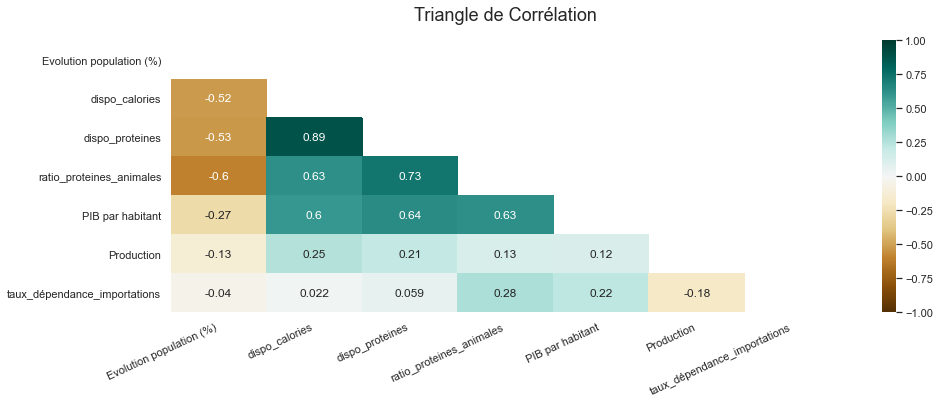

In [130]:
plt.figure(figsize=(15,5))

mask = np.zeros_like(df_bilans_clus.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_bilans_clus.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

plt.xticks(rotation=25, ha='right')
plt.title('Triangle de Corrélation',  fontsize=18, pad=20)

plt.show()

# Observations
D'après le tableau de corrélation coloré ci-dessus, on peut constater une corrélation positive très forte entre la disponibilité alimentaire en protéine par personnes et celle en kcal par personne .

On peut aussi  constater une corrélation positive  forte entre la pourcentage de protéine d'origine animale et celle en kcal  et protéines par personne .

Dans une moindre mesure, on retrouve également une corrélation négative entre le pourcentage d'évolution de la population et les différents régimes alimentaires des pays (protéines, kcal, pourcentage de protéine d'origine animale).



# Clustering

## Classification des pays via Clustering Hiérarchique Ascendant (CHA)

La première classification sera établie sur la base des variables suivantes :

**La différence de population entre l'année 2013 et l'année 2019, exprimée en pourcentage;\
La proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays;\
La disponibilité alimentaire en grammes de protéines par habitant ;\
La disponibilité alimentaire en Kcal par habitant.**

L'échantillon comporte peu de variables sur la dimension dite du "Régime alimentaire", il comporte également un nombre de pays "maîtrisables" qui permet de commencer par une classification hiérarchique. Algorithme qui a une forte complexité algorithmique en temps et en espace, le clustering hiérarchique est recommandé pour les petits échantillons.


# Premier clustering

Le partitionnement ou clustering a pour objectif de créer des groupes d’observations homogènes.

Au préalable, il est nécessaire de centrer-réduire les données. C’est à dire, recalculer chaque valeur de manière à ce que la moyenne de la variable soit égale à 0 et la variance et l’écart-type égalent 1. Pour une variable donnée, on soustrait à chaque valeur la moyenne de la variable, puis on divise le tout par l’écart-type.

Ensuite, nous pouvons procéder à la classification ascendante hiérarchique selon la méthode de Ward. **L’objectif est de regrouper des pays similaires.**

In [131]:
# dans array numpy
X = df_bilans_clus.values 
pays = df_bilans_clus.index
#nous allons extraire les données d'expression de 175 pays  dans un tableau de données numériques .
 #X comporte uniquement les données  , il ne contient pas les étiquettes des échantillons.
 #Conservons les étiquettes de chaque échantillon  dans la variable pays.
print('X', X.shape)
print('pays', pays.shape, pays.unique())


X (173, 7)
pays (173,) Index(['Arménie', 'Afghanistan', 'Albanie', 'Algérie', 'Angola',
       'Antigua-et-Barbuda', 'Argentine', 'Australie', 'Autriche', 'Bahamas',
       ...
       'Éthiopie', 'Samoa', 'Yémen', 'République démocratique du Congo',
       'Zambie', 'Belgique', 'Luxembourg', 'Serbie', 'Monténégro', 'Soudan'],
      dtype='object', name='Zone', length=173)


In [132]:

# Centrage et Réduction
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler()
#Standardisez les caractéristiques en supprimant la moyenne et en mettant à l'échelle la variance unitaire.
#Le score standard d'un échantillon x est calculé comme suit :
#z = (x - u) / s où
# u est la moyenne des échantillons d'apprentissage ou zéro si with_mean=False, 
# s est l'écart type des échantillons d'apprentissage ou un si with_std=False.

X_cr = std_scale.fit_transform(X)
#Appelez X on self en produisant un DataFrame avec la même forme d'axe que self.
print('X_cr', X_cr.shape)
X_cr

X_cr (173, 7)


array([[-0.83273961,  0.30060862,  0.60867002, ..., -0.47559083,
        -0.27898747,  0.68268766],
       [ 1.29655234, -1.35291108, -1.16145453, ..., -0.68455688,
        -0.27287592,  0.43366837],
       [-1.21843895,  0.99822174,  1.64882163, ..., -0.44135044,
        -0.27898747,  0.4144446 ],
       ...,
       [-1.3337178 , -0.0459903 ,  0.23961485, ..., -0.3378867 ,
        -0.24384605, -0.57141327],
       [-1.07703381,  1.40001157,  1.4559173 , ..., -0.26411904,
        -0.28204325,  0.51982581],
       [ 0.97307127, -0.67295905, -0.27304156, ..., -0.66718968,
        -0.25492324, -0.87354786]])

In [133]:

X_cr = pd.DataFrame(X_cr, index =df_bilans_clus.index, columns=df_bilans_clus.columns)
print('X_cr', X_cr.shape)
X_cr

X_cr (173, 7)


,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB par habitant,Production,taux_dépendance_importations
Zone,,,,,,,
Arménie,-0.832740,0.300609,0.608670,0.835739,-0.475591,-0.278987,0.682688
Afghanistan,1.296552,-1.352911,-1.161455,-1.528894,-0.684557,-0.272876,0.433668
Albanie,-1.218439,0.998222,1.648822,0.697850,-0.441350,-0.278987,0.414445
Algérie,0.622387,1.340405,0.443529,-1.001658,-0.508159,-0.172417,-0.873548
Angola,1.895033,-0.973198,-1.411321,-0.795540,-0.573808,-0.264855,0.818710
...,...,...,...,...,...,...,...
Belgique,-0.647028,2.018150,0.898266,1.104052,1.616457,-0.112448,2.532713
Luxembourg,0.703863,1.364689,1.310401,1.148087,5.102695,-0.283571,1.116986
Serbie,-1.333718,-0.045990,0.239615,0.494718,-0.337887,-0.243846,-0.571413


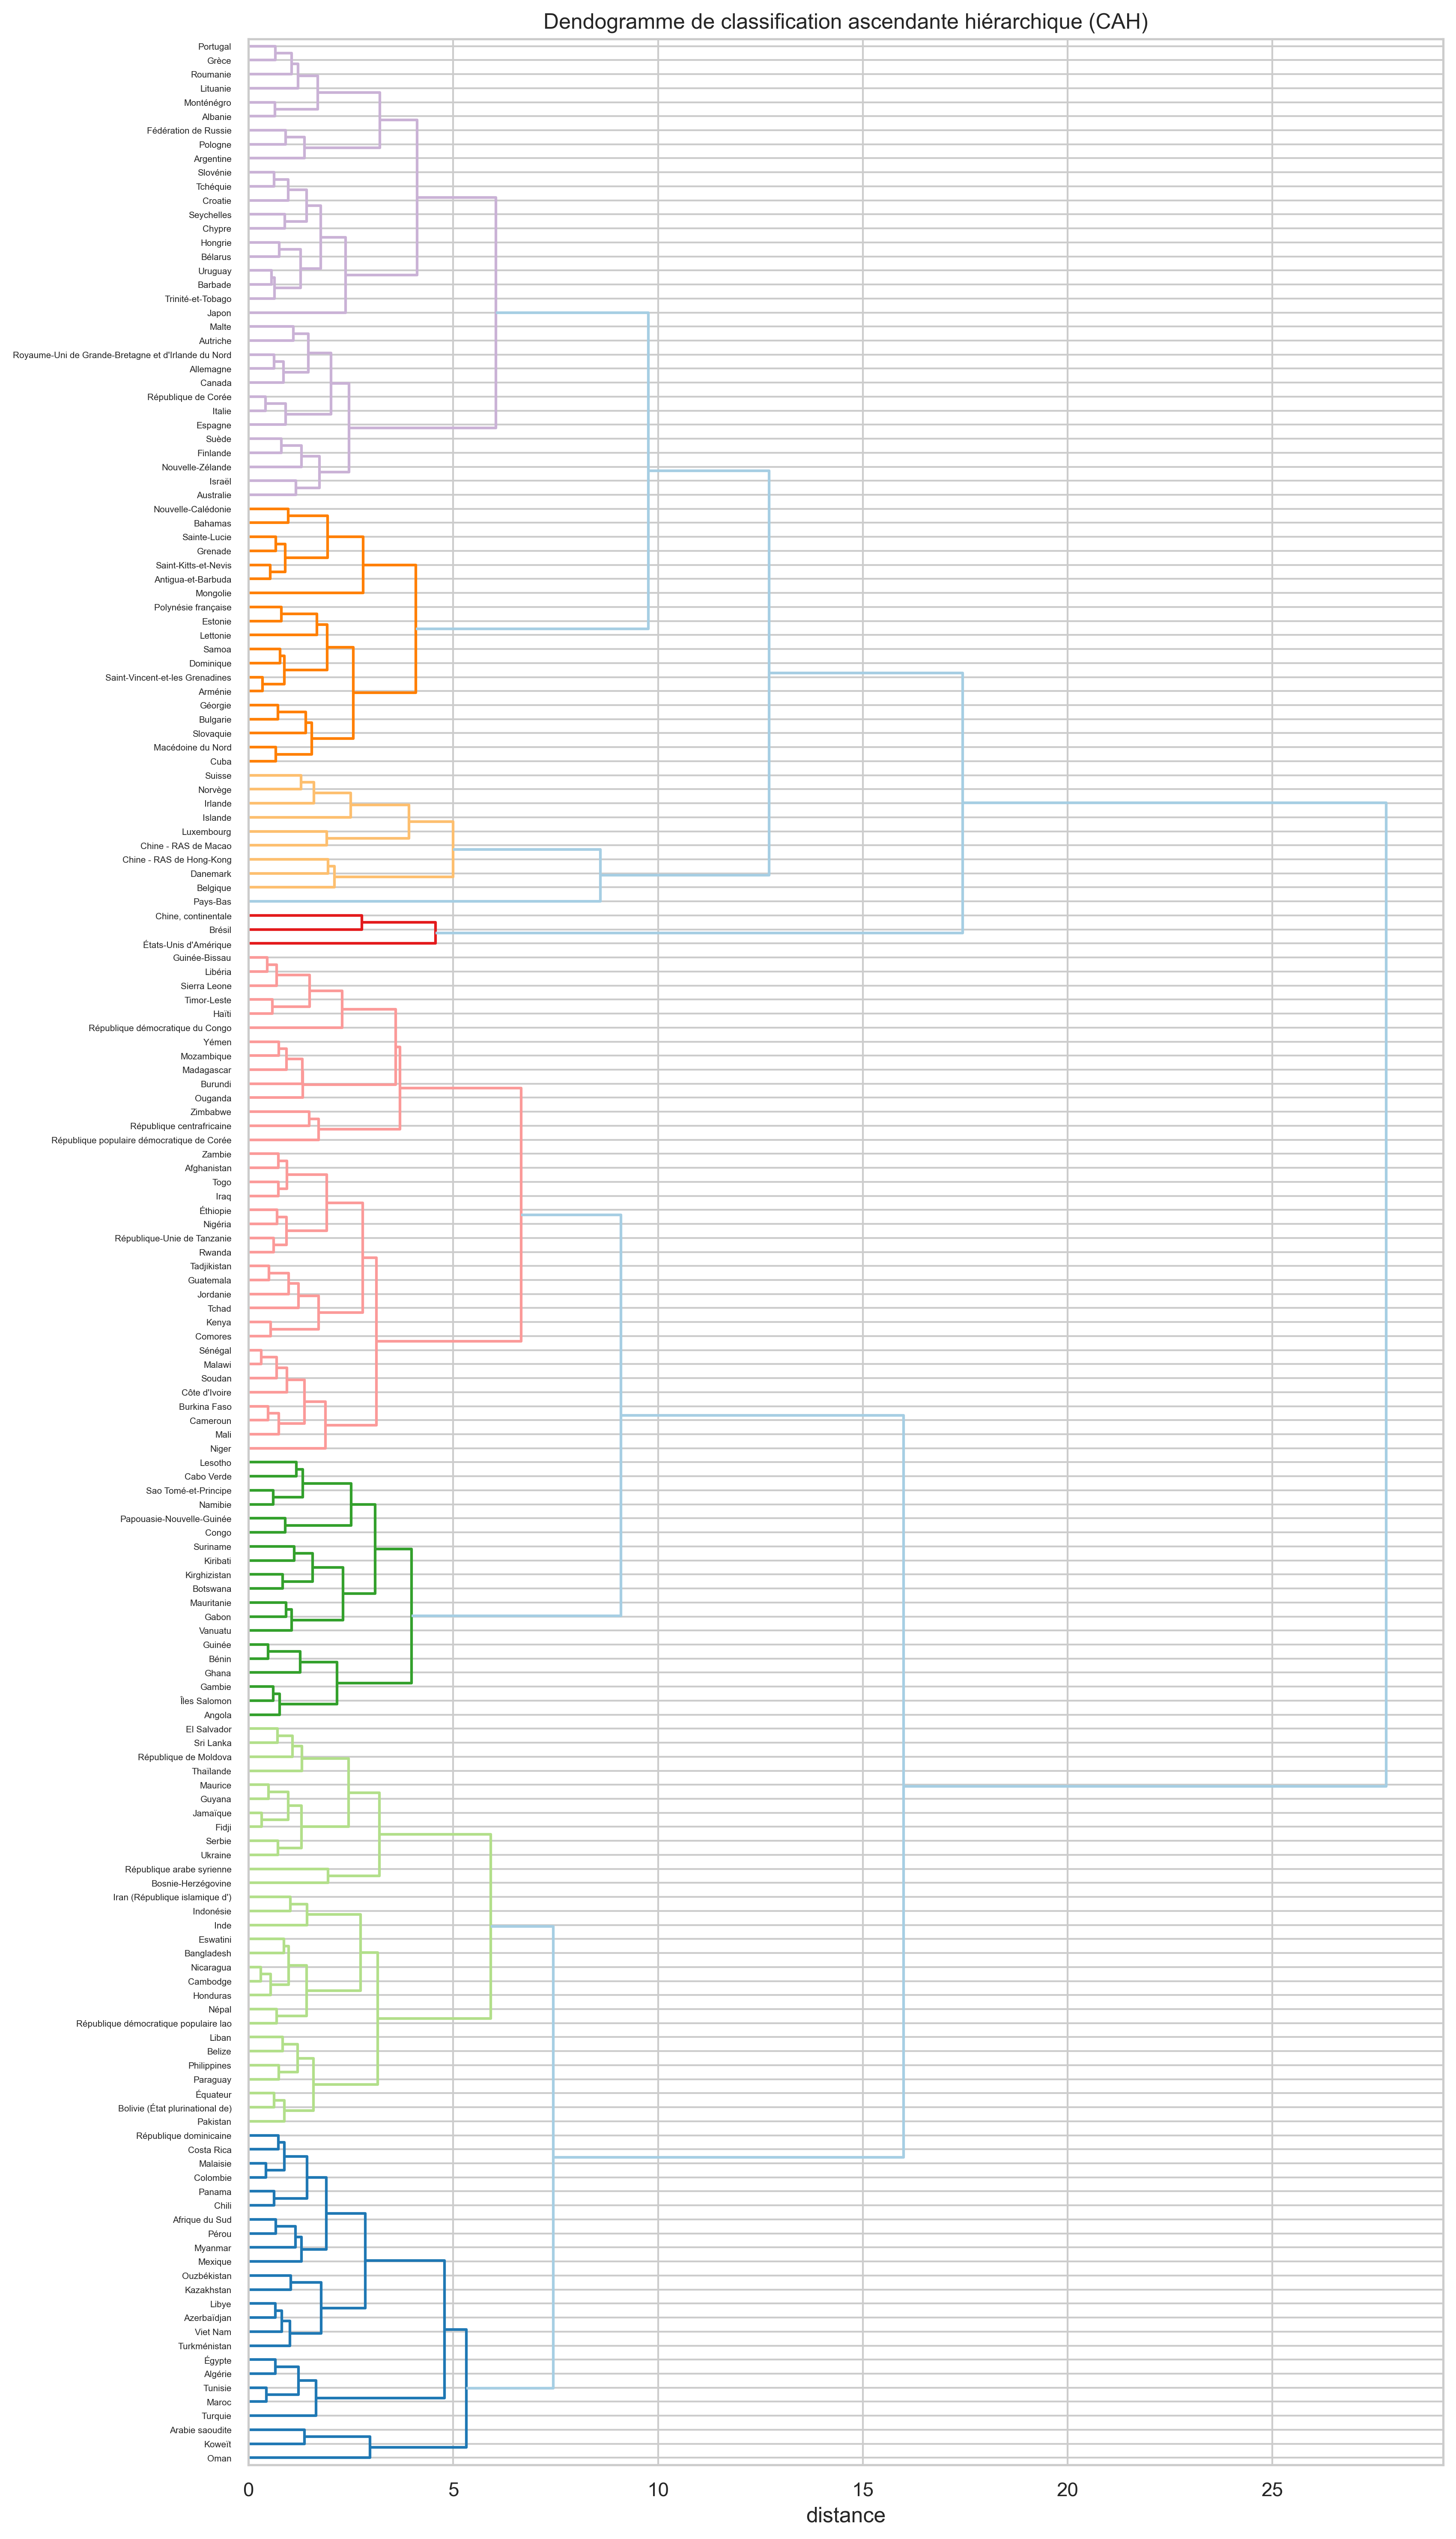

In [134]:
# Clustering hiérarchique avec librairie scipy
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
z=linkage(X_cr, method='ward' ,metric='euclidean')

# Affichage du dendogramme
plt.figure(figsize=(12,25), dpi=300)
plt.title('Dendogramme de classification ascendante hiérarchique (CAH)')
plt.xlabel('distance')
dendrogram(
    linkage(X_cr, method='ward' ,metric='euclidean'),#Regroupement hiérarchique encodé avec la matrice renvoyée par la fonction de linkage.
    labels = pays,
    orientation = "right",
    color_threshold=7
)
plt.savefig('exports/dendogram_CAH_1.png')
plt.show()

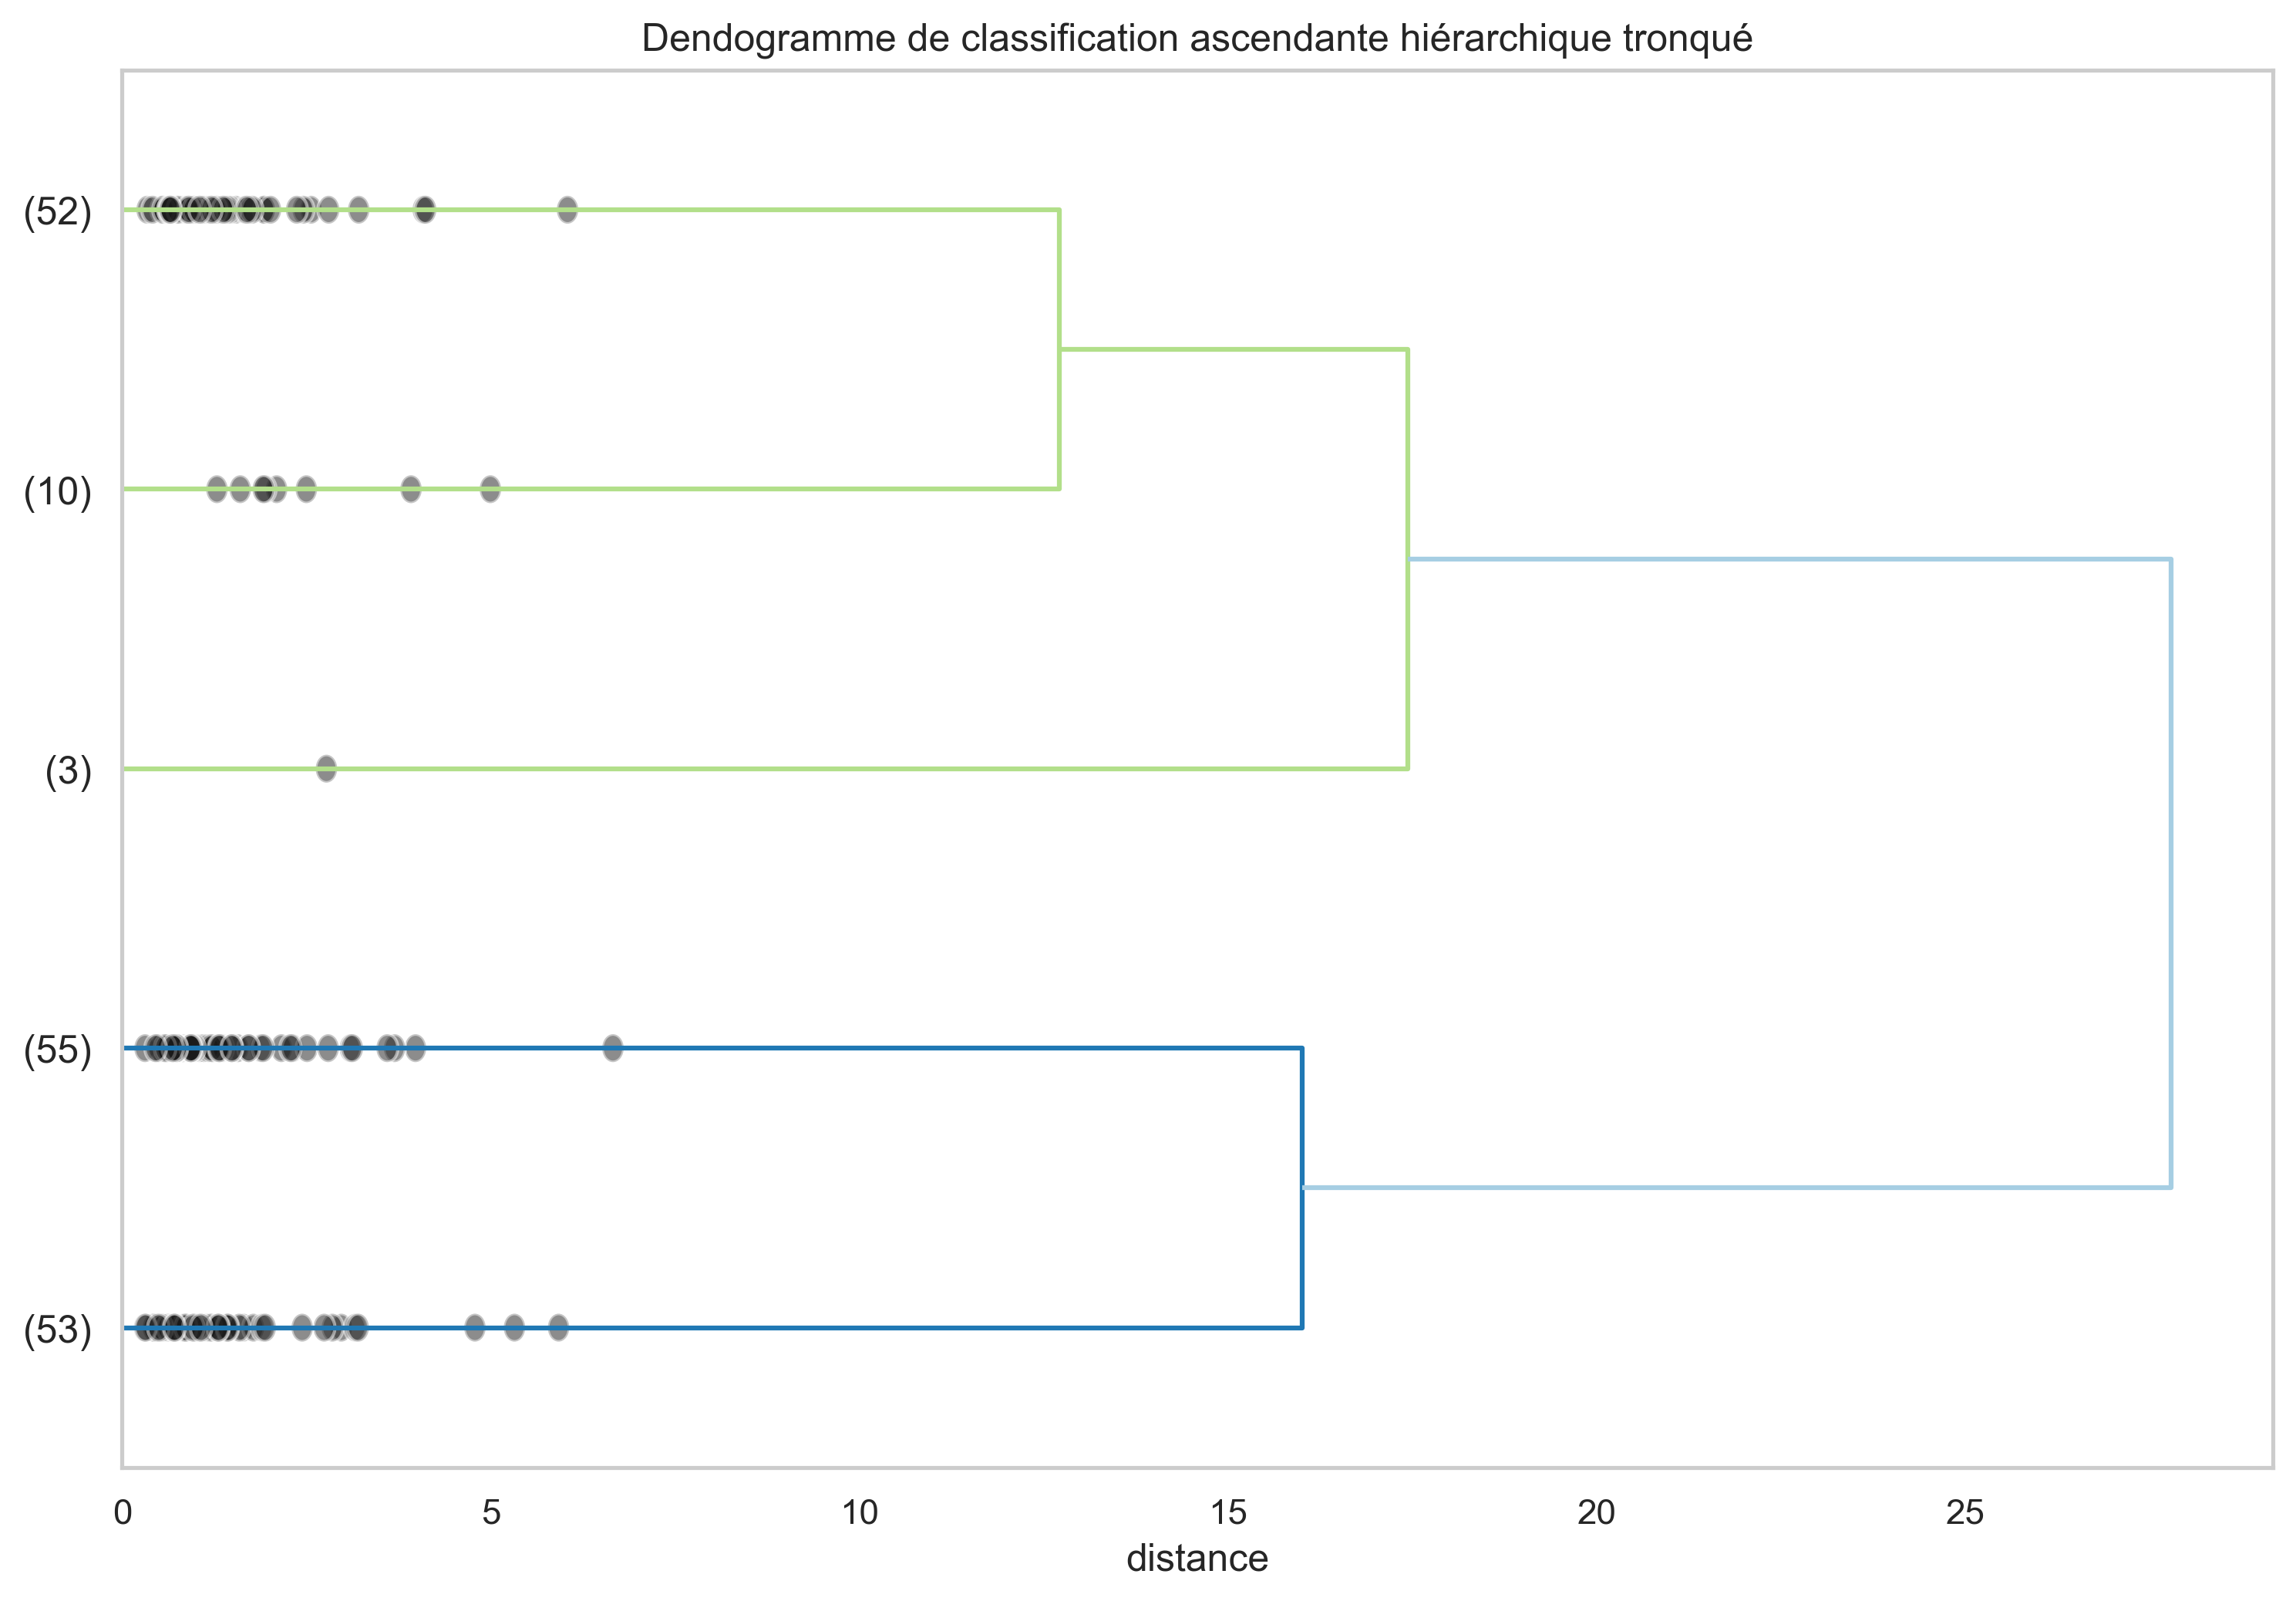

In [135]:
plt.figure(figsize=(12,8), dpi=300)
plt.title('Dendogramme de classification ascendante hiérarchique tronqué')
plt.xlabel('distance')
plt.grid(False)
dendrogram(
    linkage(X_cr, method='ward' ,metric='euclidean'),
    truncate_mode='lastp', #Les p derniers clusters non singleton formés dans la liaison sont les seuls nœuds non feuilles dans la liaison ; 
    p = 5,
    labels = pays,
    orientation = "right",
    show_contracted=True,)
plt.savefig('exports/dendogram_CAH_truncated_1.png')
plt.show()



-> Il apparaît donc 5 groupes de pays, 


# Attribution des 5 groupes et World map de répartition

In [136]:

# Coupage du dendrogramme en 5 clusters avec Scipy
clusters_cah = fcluster(linkage(X_cr, method='ward' ,metric='euclidean'), 5, criterion='maxclust')
#criterion , Critère à utiliser pour former des clusters plats. 
#maxclust : Trouve un seuil minimum r pour que la distance cophénétique entre deux observations originales quelconques dans le même cluster plat ne soit pas supérieure à r et que pas plus de t clusters plats soient formés.
clusters_cah


array([5, 2, 5, 1, 2, 5, 5, 5, 5, 5, 5, 1, 1, 2, 3, 1, 2, 5, 1, 2, 2, 5,
       2, 2, 1, 2, 1, 3, 1, 2, 2, 1, 5, 5, 1, 2, 4, 5, 1, 5, 1, 1, 1, 5,
       1, 5, 5, 5, 2, 2, 5, 1, 2, 2, 5, 5, 2, 2, 1, 2, 1, 4, 5, 5, 4, 1,
       1, 1, 2, 4, 5, 5, 2, 1, 1, 5, 2, 2, 2, 1, 2, 5, 1, 5, 1, 1, 2, 2,
       1, 5, 4, 2, 2, 1, 2, 5, 2, 1, 1, 5, 1, 2, 1, 2, 1, 4, 5, 5, 2, 5,
       1, 2, 2, 4, 1, 1, 5, 2, 1, 1, 1, 5, 5, 2, 2, 2, 5, 2, 5, 5, 5, 5,
       2, 1, 2, 5, 2, 5, 5, 1, 5, 2, 2, 1, 5, 4, 1, 1, 2, 1, 2, 5, 1, 1,
       1, 2, 5, 1, 3, 2, 5, 1, 1, 2, 5, 2, 2, 2, 4, 4, 1, 5, 2],
      dtype=int32)

In [137]:
#index triés des groupes
idg = np.argsort(clusters_cah)
#Renvoie les indices qui trieraient un tableau.
idg

array([ 40,  38,  84,  41,  42,  44, 120, 119, 118, 115,  51, 114, 110,
       104, 133,  58, 102, 100,  98,  65,  66,  67,  97,  93,  73,  74,
        88,  85,  79,  60,  34,  82, 147, 157, 154,  15, 153,  31, 152,
       161, 162,  18, 149,  11, 146,  12,  24, 170, 139, 143,  26,   3,
        28, 159, 167,  87,  91, 166,  96,  94, 163, 165,  92, 136, 108,
       155, 134, 141, 132, 127, 125, 142, 101, 124, 148, 117, 150, 112,
       111, 103, 123,  86, 172,  59,  16,  48,  49,  13,  22,  52,  53,
        23,  30,  56,  25,  57,  20,  35,  19,  68,  80,  78,   1,  29,
        77,   4,  76,  72,  14, 158,  27,  64,  90, 113, 169, 105,  69,
        61,  36, 145, 168, 140, 144,  21,  83,  17, 156,  10,   9, 160,
         8,   7,   6, 164,   5,   2, 151, 138,  37,  32, 171,  89,  75,
        71,  70,  95,  99,  63,  62, 106, 107, 109,  55,  54,  50, 116,
        47, 135,  33, 131, 130, 129, 128, 137,  81,  39,  43,  45, 122,
       121,  46, 126,   0])

In [138]:

#affichage des pays et leurs groupes
df_groupage_1 = pd.DataFrame(columns=["groupe_cah","Zone"])
df_groupage_1["Zone"] = df_bilans_clus.index[idg]
df_groupage_1["groupe_cah"] = clusters_cah[idg]
df_groupage_1.head()

,groupe_cah,Zone
0,1,Équateur
1,1,République dominicaine
2,1,République démocratique populaire lao
3,1,Égypte
4,1,El Salvador


In [139]:
# Jointure pour ajout des groupes dans le dataframe principal
df_groupes_cah = pd.merge(df_bilans_clus, df_groupage_1, on="Zone")
df_groupes_cah.to_csv('exports/df_groupes_cah.csv', index=False)
df_groupes_cah.sample(5)

,Zone,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB par habitant,Production,taux_dépendance_importations,groupe_cah
9,Bahamas,6.077,958490.0,27776.50,63.640,34863.742098,6.0,113.636364,5
137,Slovénie,0.753,1149385.0,34799.10,54.521,26062.166820,70.0,46.000000,5
131,Saint-Vincent-et-les Grenadines,1.811,1076385.0,33382.90,56.932,7463.537831,0.0,88.888889,5
105,Pays-Bas,1.506,1223845.0,39460.15,64.351,53052.814311,1036.0,404.026846,4
1,Afghanistan,17.887,829645.0,20918.15,18.042,469.919090,28.0,65.671642,2


In [140]:
#Première comparaison des moyennes afin d'identifier le groupe de pays le plus porteur à ce niveau de l'analyse
df_groupes_cah.groupby('groupe_cah').mean()

,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB par habitant,Production,taux_dépendance_importations
groupe_cah,,,,,,,
1,7.509415,1.073775e+06,29571.335849,39.970849,6535.640131,759.867925,14.707837
2,15.692127,8.846472e+05,22233.410909,26.838545,1857.123607,46.981818,50.122175
3,3.998000,1.272025e+06,38217.933333,54.558000,27964.185954,19145.666667,1.554247
4,5.789400,1.273923e+06,41535.905000,63.965200,72176.739277,203.400000,121.352251
5,1.883404,1.155864e+06,35209.023077,57.231212,22704.803840,502.019231,54.571212


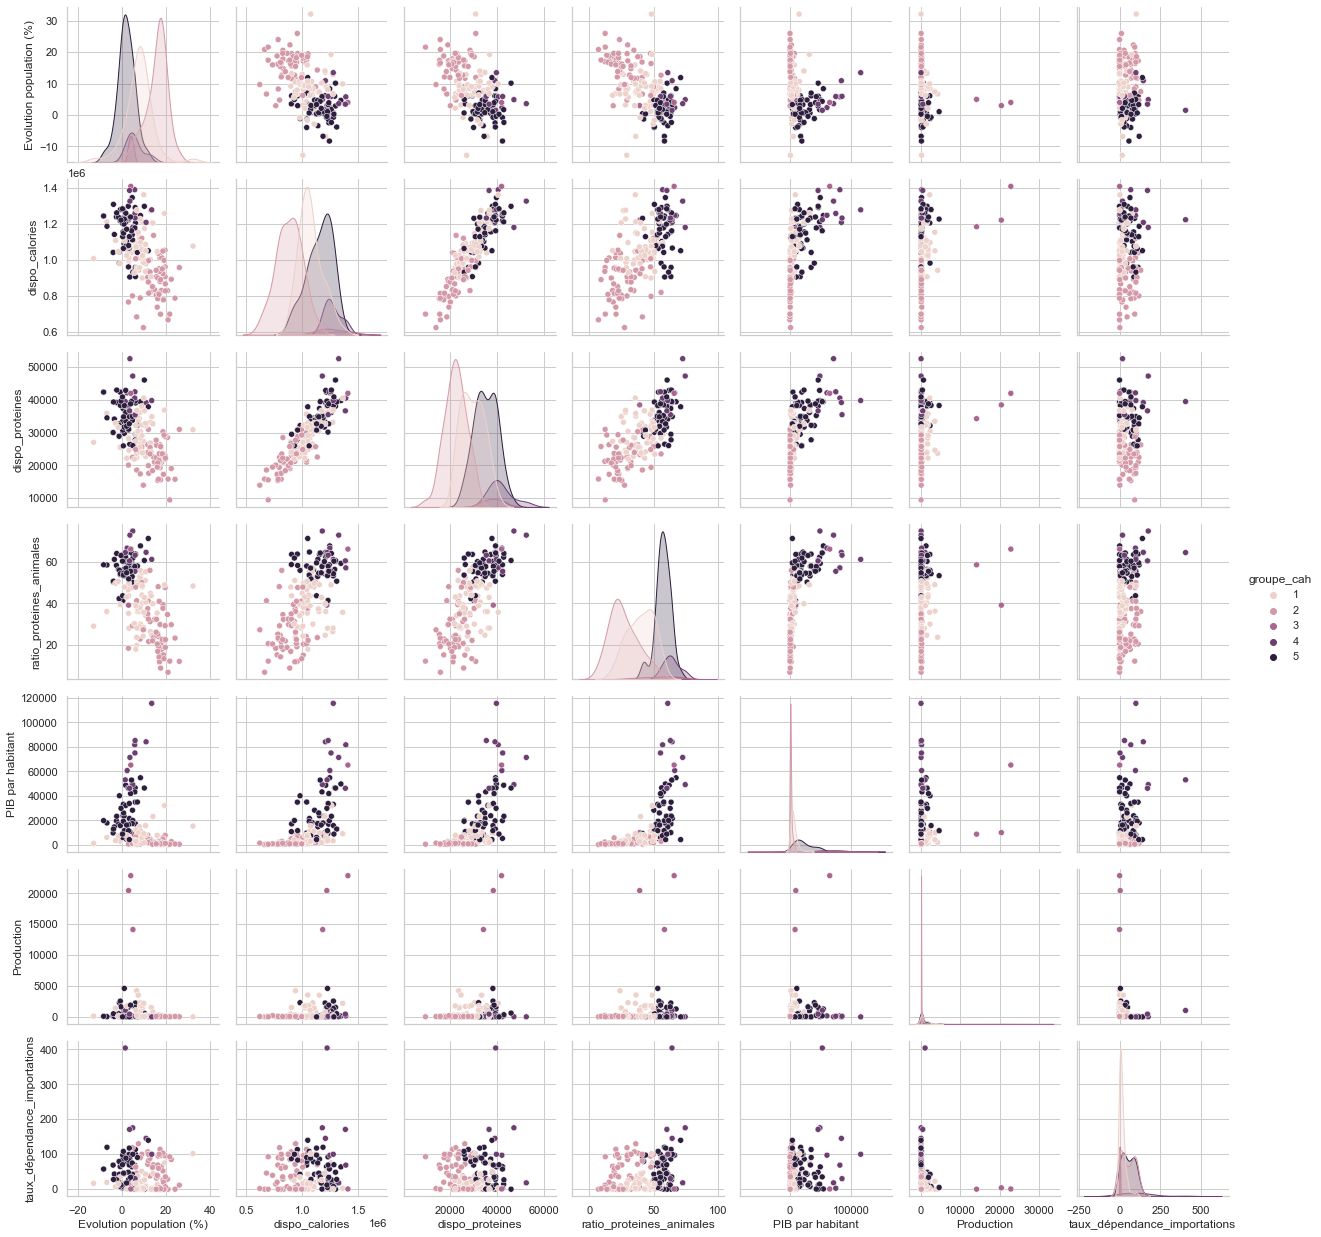

In [141]:
# Pairplot avec coloration des groupes
sns.pairplot(df_groupes_cah[["Evolution population (%)", "dispo_calories",
                                   "dispo_proteines","ratio_proteines_animales", "groupe_cah",'PIB par habitant','Production','taux_dépendance_importations']], hue="groupe_cah")


In [142]:
#Première comparaison des moyennes afin d'identifier le groupe de pays le plus porteur à ce niveau de l'analyse
df_groupes_cah.groupby('groupe_cah').mean()




,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB par habitant,Production,taux_dépendance_importations
groupe_cah,,,,,,,
1,7.509415,1.073775e+06,29571.335849,39.970849,6535.640131,759.867925,14.707837
2,15.692127,8.846472e+05,22233.410909,26.838545,1857.123607,46.981818,50.122175
3,3.998000,1.272025e+06,38217.933333,54.558000,27964.185954,19145.666667,1.554247
4,5.789400,1.273923e+06,41535.905000,63.965200,72176.739277,203.400000,121.352251
5,1.883404,1.155864e+06,35209.023077,57.231212,22704.803840,502.019231,54.571212


In [143]:
#Préparation de sous-ensembles permettant de caractériser les groupes un à un
df_groupe1_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 1]
df_groupe2_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 2]
df_groupe3_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 3]
df_groupe4_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 4]
df_groupe5_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 5]

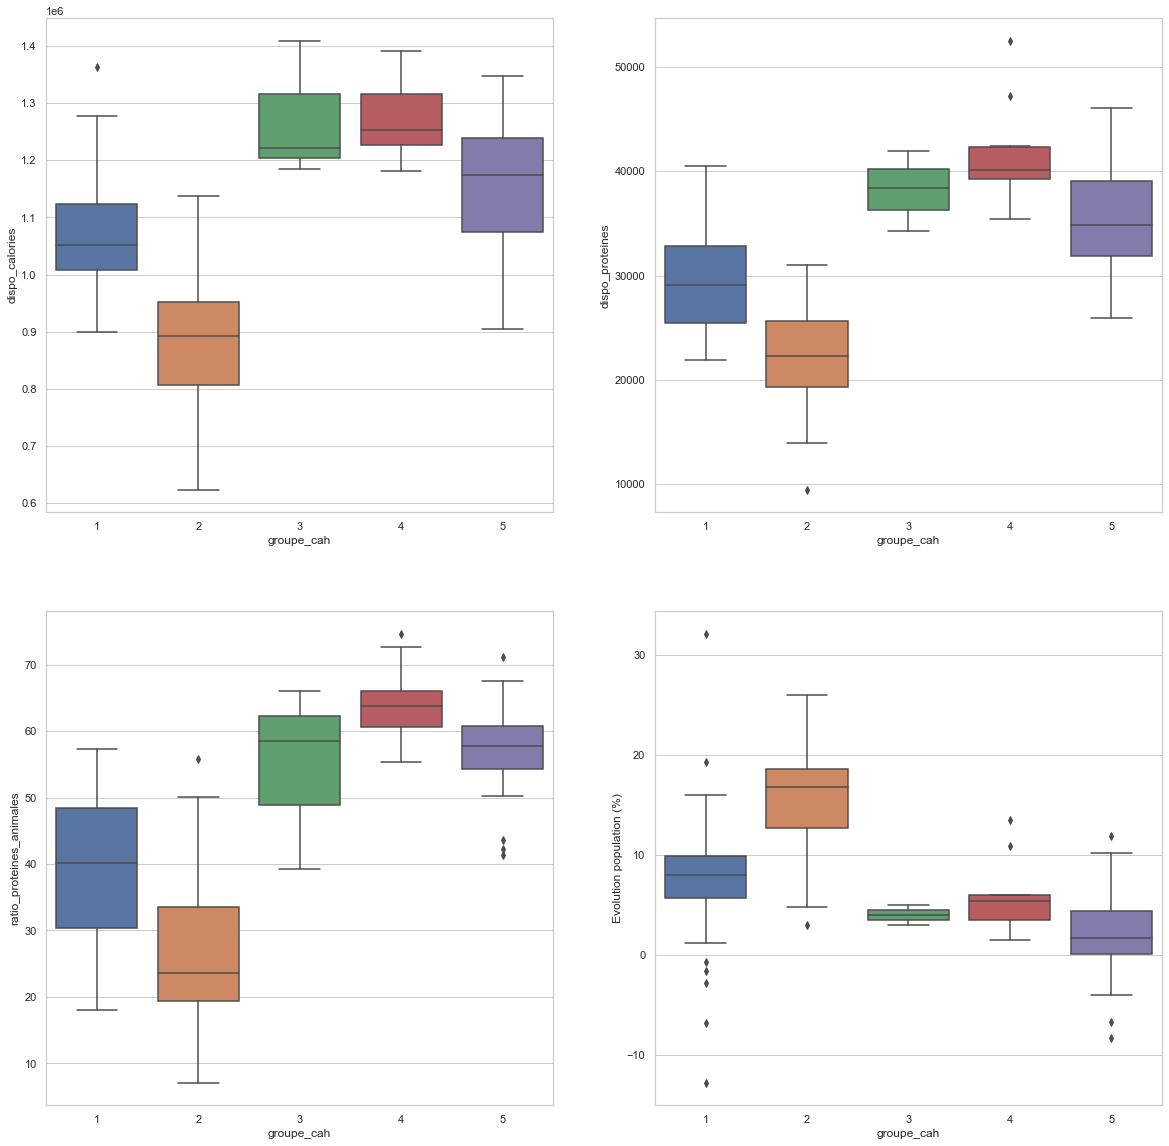

In [144]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='dispo_calories')

plt.subplot(222)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='dispo_proteines')

plt.subplot(223)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='ratio_proteines_animales')

plt.subplot(224)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='Evolution population (%)')



plt.savefig("exports/boxplot_dendogramme1.png")

plt.show(block=False)

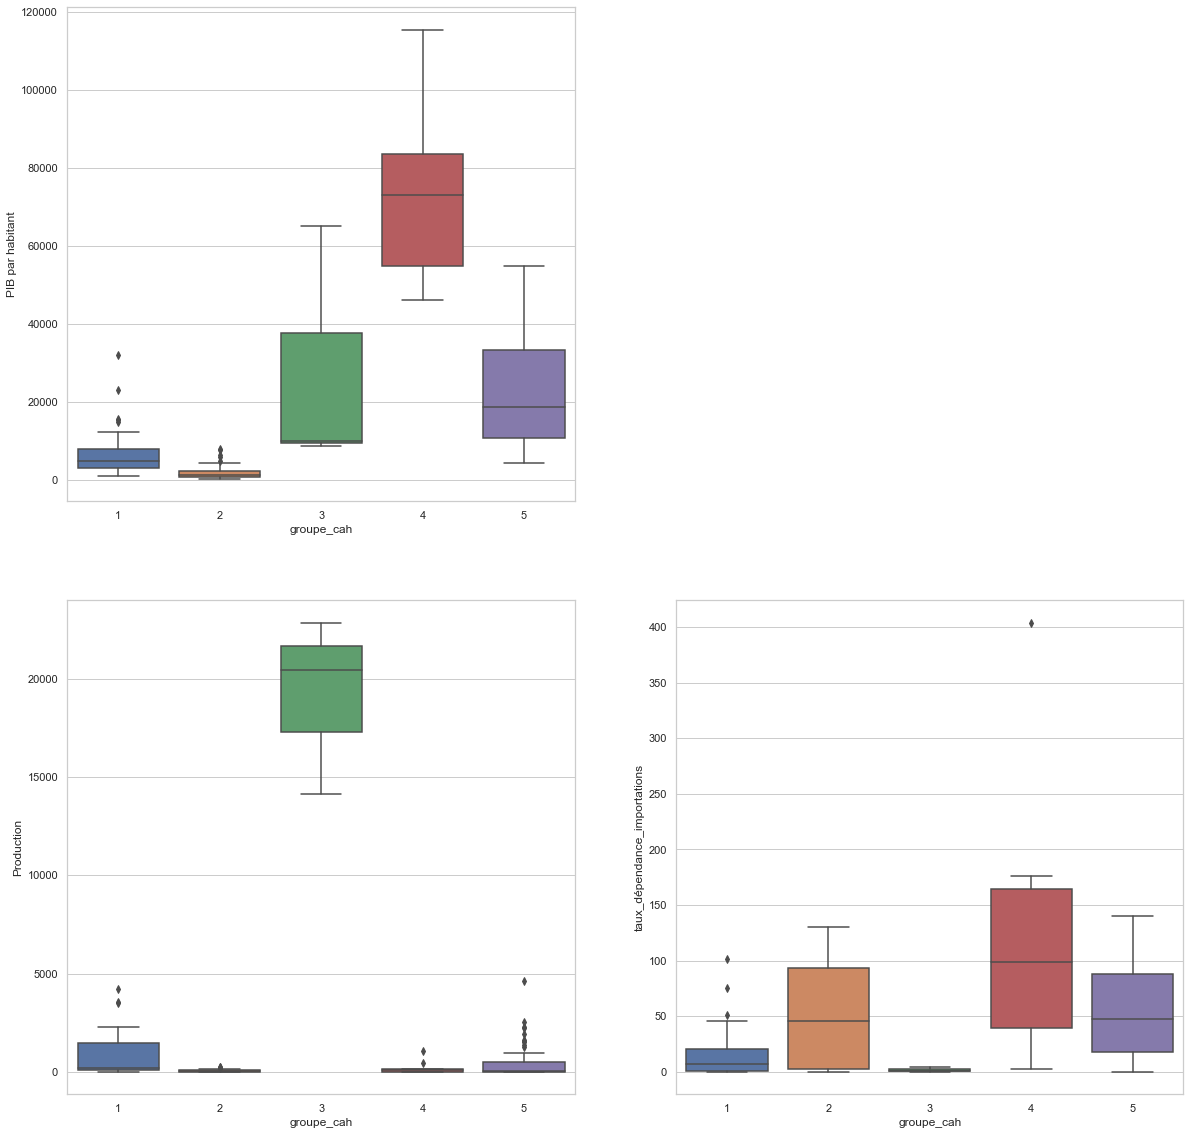

In [145]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='PIB par habitant')



plt.subplot(223)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='Production')


plt.subplot(224)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='taux_dépendance_importations')



plt.savefig("exports/boxplot_dendogramme.png")

plt.show(block=False)

In [146]:
df_select_pays_cah = df_groupes_cah[df_groupes_cah["groupe_cah"].isin([4,5]) == True]

df_select_pays_cah.to_csv('exports/df_select_pays_cah.csv', index=False)
df_select_pays_cah

,Zone,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB par habitant,Production,taux_dépendance_importations,groupe_cah
0,Arménie,2.076,1103030.0,34415.85,56.061,4622.733216,12.0,78.181818,5
2,Albanie,-0.788,1218370.0,42347.30,53.844,5303.197823,12.0,64.705882,5
5,Antigua-et-Barbuda,6.121,907025.0,29492.00,63.515,17112.821135,0.0,100.000000,5
6,Argentine,6.125,1205960.0,39036.75,63.478,10041.463303,2248.0,0.247525,5
7,Australie,8.378,1247205.0,39398.10,67.547,54763.202388,1278.0,0.724055,5
...,...,...,...,...,...,...,...,...,...
160,Uruguay,2.133,1171285.0,31941.15,54.668,16190.138438,31.0,17.647059,5
164,Samoa,3.345,1129675.0,32663.85,59.426,4285.485317,0.0,117.647059,5
168,Belgique,3.455,1387000.0,36624.10,60.375,46198.310321,448.0,171.122995,4
169,Luxembourg,13.486,1278960.0,39766.75,61.083,115480.867570,0.0,100.000000,4


In [147]:
#Pays du groupe 1 et 2 identifiés comme potentiellement intéressants

print('groupe 1')
print('----------')
print(df_groupe1_cah['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')


print('groupe 2')
print('----------')
print(df_groupe2_cah['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')


print('groupe 3')
print('----------')
print(df_groupe3_cah['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')


print('groupe 4')
print('----------')
print(df_groupe4_cah['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')


print('groupe 5')
print('----------')
print(df_groupe5_cah['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')



groupe 1
----------
['Algérie' 'Bangladesh' 'Bolivie (État plurinational de)' 'Belize'
 'Myanmar' 'Sri Lanka' 'Chili' 'Colombie' 'Costa Rica' 'Azerbaïdjan'
 'République dominicaine' 'Équateur' 'Égypte' 'El Salvador' 'Fidji'
 'Bosnie-Herzégovine' 'Guyana' 'Honduras' 'Inde' 'Indonésie'
 "Iran (République islamique d')" 'Kazakhstan' 'Jamaïque' 'Cambodge'
 'Koweït' 'République démocratique populaire lao' 'Liban' 'Libye'
 'Malaisie' 'Maurice' 'Mexique' 'Maroc' 'République de Moldova' 'Népal'
 'Nicaragua' 'Pakistan' 'Panama' 'Paraguay' 'Pérou' 'Philippines'
 'Arabie saoudite' 'Afrique du Sud' 'Eswatini' 'République arabe syrienne'
 'Turkménistan' 'Thaïlande' 'Oman' 'Tunisie' 'Turquie' 'Ukraine'
 'Ouzbékistan' 'Viet Nam' 'Serbie']
------------------------------------------------------------
------------------------------------------------------------
groupe 2
----------
['Afghanistan' 'Angola' 'Botswana' 'Îles Salomon' 'Burundi' 'Cameroun'
 'Cabo Verde' 'République centrafricaine' 'Tchad' 'Co

Les clusters 1 et 2, situés majoritairement en Afrique, sont ceux qui ont les démographies les plus fortes et les PIB/habitants les plus faibles.

Les cluster 4 et 5 reflètent au contraire des pays en moyenne plus riches comme les USA ou la plupart des pays européens.

Le cluster 3 est dans une position intermédiaire.

Concernant les disponibilités alimentaires, celles-ci suivent les même tendances que le PIB. Les pays les plus pauvres ont un moindre accès à l’alimentation. Cela fait écho aux problème de sous-nutrition mis en évidence lors du projet 3.

La consommation de protéines animales confirme le partitionnement, avec une forte alimentation carnée de la part des clusters 5 et 3.

En revanche, les deux dernières variables évoluent bien différemment. Nous voyons que les clusters 4 et 5 sont ceux qui importent beaucoup plus de viandes de volailles qu’ils n’en produisent.

Le groupe 3 est celui qui dépend le plus de l'importation.

Le groupe 4 est l'un des plus grands pays producteurs de poulet.


En conclusion pour cette première division, 64 pays deviendraient vraisemblablement une cible appropriée pour l'entreprise. La demande sera présente dans ces pays.
Appliquons une autre méthode, celle des K-Means, afin de pouvoir comparer cette première sélection...

# Application de l'algorithme du K-Means

Le clustering K-Means est une méthode de clustering simple mais puissante qui crée 𝑘 segments distincts des données où la variation au sein des clusters est aussi petite que possible. Pour trouver le nombre optimal de clusters, je vais essayer différentes valeurs de 𝑘 et calculer l'inertie, ou score de distorsion, pour chaque modèle. L'inertie mesure la similarité du cluster en calculant la distance totale entre les points de données et leur centre de cluster le plus proche. Les clusters avec des observations similaires ont tendance à avoir des distances plus petites entre eux et un score de distorsion plus faible dans l'ensemble.

## La méthode de coude nous aidera pour identifier les clusters.

Nous exécutons l'analyse de cluster en utilisant le cluster de 1 à 10.

De plus, nous stockons les scores WSS.

Le score WSS sera utilisé pour créer le Elbow Plot

WSS = intra-cluster-somme du carré


WSS = Within-Cluster-Sum of Squared

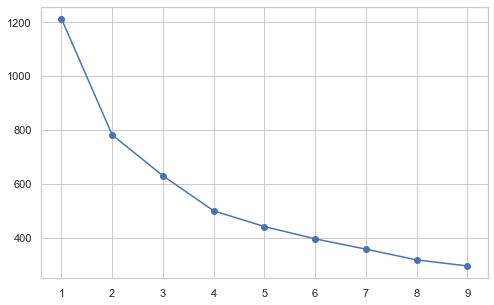

In [148]:
K=range(1,10)
k_means = []
#On fait une boucle de 2 à 9 pour tester toutes ces possibiliéts
for k in K:
    #pour chaque k, on crée un modèle et on l’ajuste
    kmeans=KMeans(n_clusters=k,init="k-means++").fit(X_cr)
     #on stocke l’inertie associée
    k_means.append(kmeans.inertia_)


#Visualisation des valeurs d'inertie pour chaque nombre de cluster
plt.plot(range(1, 10), k_means, marker='o')
plt.show()

In [149]:
mycenters = pd.DataFrame({'groupe_km' : K, 'WSS' : k_means})
mycenters

,groupe_km,WSS
0,1,1211.000000
1,2,780.670827
2,3,629.162531
3,4,499.208349
4,5,440.925311
5,6,395.373490
6,7,357.208187
7,8,317.307526
8,9,294.890676


Idéalement, pour optimiser et ne pas perdre trop d'information il serait indiquer de choisir un k = 2.

 Un clustering en 3, puis en 5 permettra également de comparer le partitionnement avec les groupes de la classification hiérarchique. Il est pertinent de comparer les deux méthodes sur le même nombre de clusters.

In [150]:
#Clustering K-Means en 3 clusters
cls3 = cluster.KMeans(n_clusters=3)
cls3.fit(X_cr)
#Clustering K-Means en 5 clusters
cls5 = cluster.KMeans(n_clusters=5)
cls5.fit(X_cr)
#Récupération des clusters attribués à chaque individu (classes d'appartenance)
clusters_kmeans3 = cls3.labels_
clusters_kmeans5 = cls5.labels_



# Visualisation des clusters en ACP pour la projection des données


Le principe de **la réduction de dimension** est de réduire la complexité superflue d'un dataset en projetant ses données dans un espace de plus petite dimension .

Le principe  de **ACP** est de projeter nos données sur des axes appelés Composantes Principales, en cherchant à minimiser la distance entre nos points et leur projections. De cette manière on réduit la dimension préservant au maximum la variance de nos données. Pour **Préserver un maximum de variance pour optenir la projection qu'il soit la plus fidèle possible à nos données.**
 
 Analyse Pour trouver les axes de projection (xp): 
 Pour faire ça dans point de vue mathématique on
 1. On calcule la matrice de covariance des données 
 2. On détermine les vecteurs propres de cette matrice : ce sont les Composantes Principales 
 3. (On projette les données sur ces axes)
 


 
**L'ACP (Analyse en Composante Principale) permettra une visualisation des clusters pays sur le premier plan factoriel (ou plus). Il deviendra alors facile de pouvoir appréhender le "comportement" des différents groupes.**

PCA est un transformer ! 
1. Définir le nombre de composantes 
2. Transformer les données avec fit transform()

Il y a deux cas possibles pour choisir le nombre de composantes sur lesquels projeter nos données? et bien :
1. Celui dans lequel vous cherchez à visualiser vos données dans un espace de 2d ou 3D ,pour ça c'est très simple, le nombre de composants doit être égale à deux ou trois
2. Celui dans lequel vous cherchez à compresser vos données pour accélérer l'apprentissage de la machine sur des taches de classification ou de régression, pour ça il faut choisir le nombre de composantes de telle sorte à préserver entre 95 et 99 % de la variance de vos données.

### Définir le nombre de composantes 

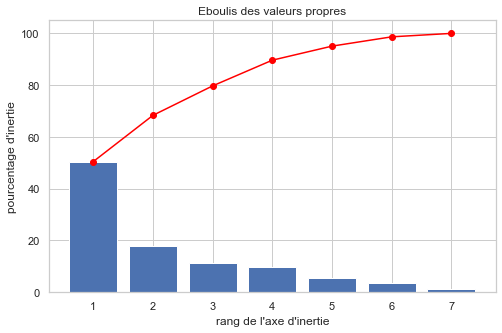

[ 50.48196116  68.35304621  79.72400704  89.65251374  95.07853945
  98.6710612  100.        ]


array([50.48196116, 17.87108505, 11.37096082,  9.92850671,  5.4260257 ,
        3.59252176,  1.3289388 ])

In [151]:
import pca as pca
from sklearn import decomposition
#Représentation de la variance expliquée 
model_pca = decomposition.PCA()
model_pca.fit(X_cr)

#nous allons examiner quel est le pourcentage de variance préserver pour chacune de nos composantes.
scree = model_pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')   
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show()

#Pourcentage de variance expliquée par les composantes principales à l'aide de .explained_variance_ratio_
print(scree.cumsum())
scree

Environ 70 % de la variance des données s'explique par ces deux premières composantes.

La méthode du coude précise une forte représentation de nos variables sur les deux premières composantes principales, le premier axe factoriel.

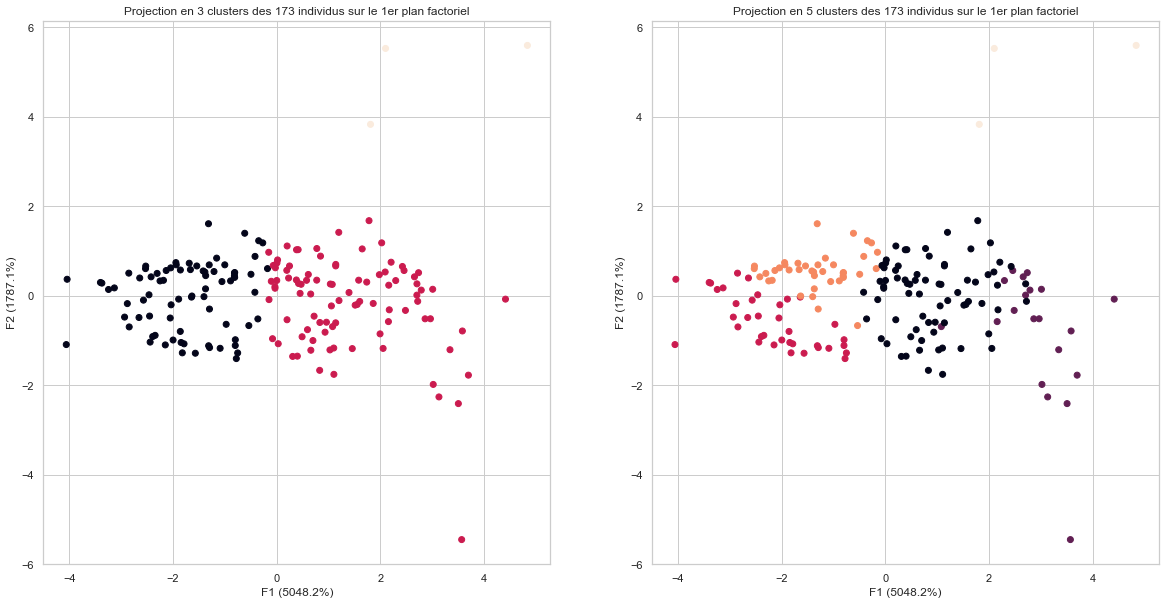

In [152]:
#Coordonnées factorielles 
X_projected = model_pca.transform(X_cr)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=cls3.labels_)
plt.xlabel('F{} ({}%)'.format(1, round(100*scree[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*scree[1],1)))
plt.title("Projection en 3 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))

plt.subplot(122)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters_kmeans5)
plt.xlabel('F{} ({}%)'.format(1, round(100*scree[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*scree[1],1)))
plt.title("Projection en 5 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))

plt.savefig("exports/projection_clusters.png")
plt.show()

La projection en 3 clusters est possible, mais l'analyse sera plus fine en 5 clusters. De plus, la comparaison sera possible avec les 5 groupes identifiés lors du précédent partitionnement, le contexte nous oriente davantage vers un clustering en 5 partitions.

Maintenant, il est nécessaire de caractériser chacun de ces groupes selon nos 8 variables. La position des centroïdes de chacun des groupes indiquera le ou les meilleurs clusters. C'est l'avantage de procéder en K-Means, afin d'obtenir directement des valeurs centrées et réduites, facilitant l'analyse. ⬇️

In [153]:
#Tableau des Centroïdes 5 clusters dans sa version centrée réduite
#La comparaison est tout de suite simplifiée, les dimensions prenant la même importance!
centroids = cls5.cluster_centers_
pd.DataFrame(centroids, columns=df_bilans_clus.columns)

,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB par habitant,Production,taux_dépendance_importations
0,-0.721717,0.434428,0.444178,0.564611,-0.035170,-0.081832,-0.000330
1,-0.286949,1.288857,1.436986,1.179742,2.246965,-0.104655,0.685869
2,1.101224,-1.220811,-1.163162,-0.896432,-0.592649,-0.270935,0.437198
3,0.485018,-0.407215,-0.536239,-0.846757,-0.563516,-0.074928,-0.683545
4,-0.573901,1.322744,1.107285,0.742258,0.698931,7.029537,-0.842610


In [154]:
#Index trié des clusters
idk = np.argsort(cls5.labels_)

#Affichage des observations selon leurs clusters
df_cls5 = pd.DataFrame(df_bilans_clus.index[idk], cls5.labels_[idk]).reset_index()
df_cls5 = df_cls5.rename(columns={'index':'groupe_km'})

In [155]:
#Intégration des clusters dans notre dataframe "df_cls5" par la méthode .merge()
#Jointure avec le dataframe initial "df_alim" selon les pays et condition 'inner'
df_cls5 = pd.merge(df_bilans_clus, df_cls5, on='Zone')
df_cls5

,Zone,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB par habitant,Production,taux_dépendance_importations,groupe_km
0,Arménie,2.076,1103030.0,34415.85,56.061,4622.733216,12.0,78.181818,0
1,Afghanistan,17.887,829645.0,20918.15,18.042,469.919090,28.0,65.671642,2
2,Albanie,-0.788,1218370.0,42347.30,53.844,5303.197823,12.0,64.705882,0
3,Algérie,12.881,1274945.0,33156.60,26.519,3975.510381,291.0,0.000000,3
4,Angola,22.331,892425.0,19012.85,29.833,2670.850732,49.0,85.015291,2
...,...,...,...,...,...,...,...,...,...
168,Belgique,3.455,1387000.0,36624.10,60.375,46198.310321,448.0,171.122995,1
169,Luxembourg,13.486,1278960.0,39766.75,61.083,115480.867570,0.0,100.000000,1
170,Serbie,-1.644,1045725.0,31601.70,50.578,7359.348533,104.0,15.178571,0
171,Monténégro,0.262,1284800.0,40876.35,60.246,8825.344514,4.0,70.000000,0


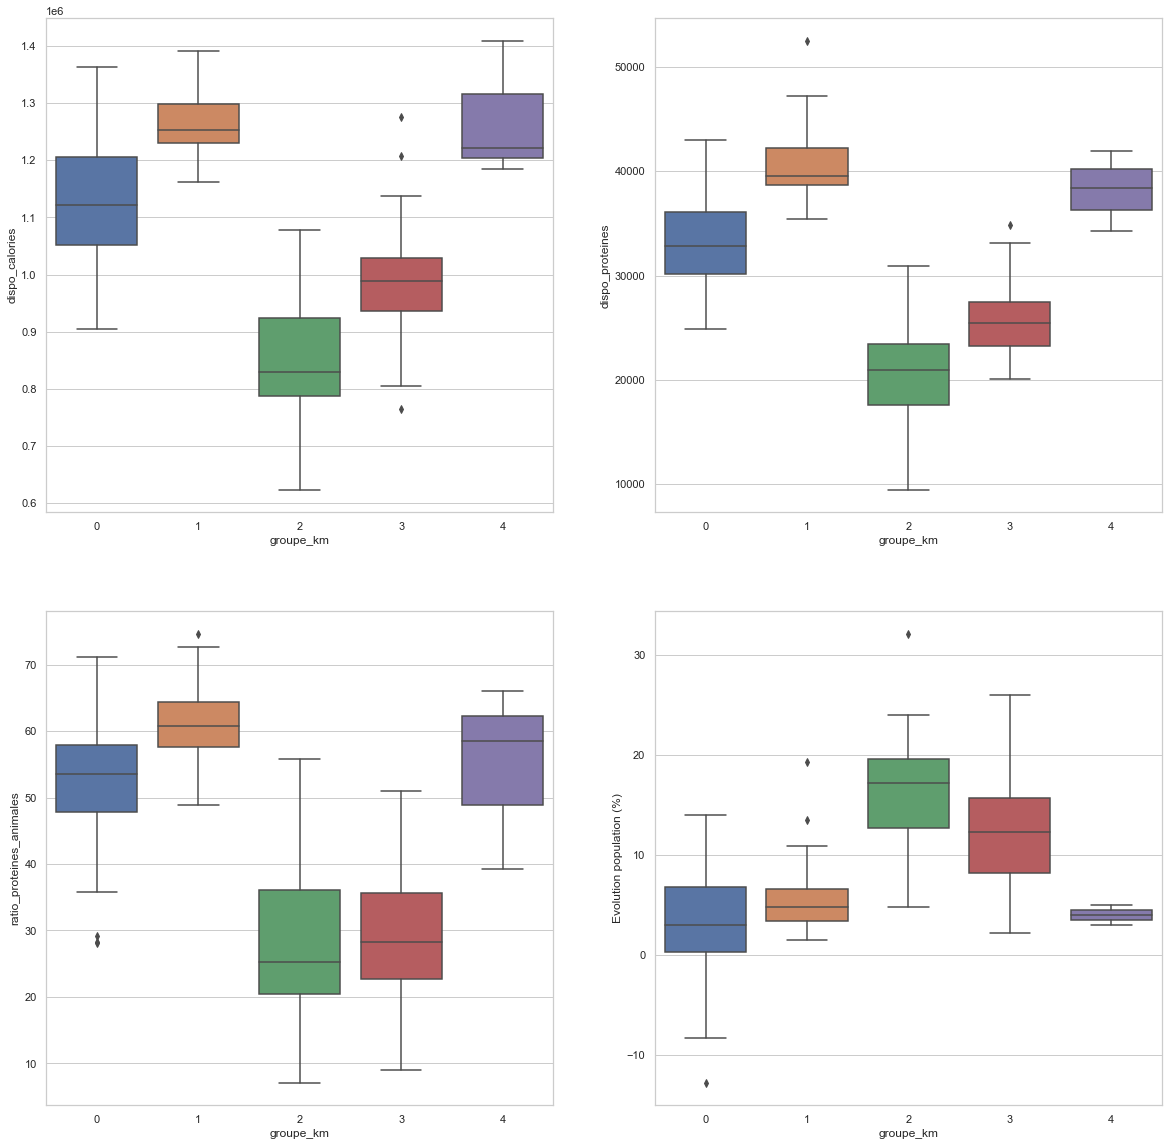

In [156]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_cls5, x='groupe_km', y='dispo_calories')

plt.subplot(222)
sns.boxplot(data=df_cls5, x='groupe_km', y='dispo_proteines')

plt.subplot(223)
sns.boxplot(data=df_cls5, x='groupe_km', y='ratio_proteines_animales')

plt.subplot(224)
sns.boxplot(data=df_cls5, x='groupe_km', y='Evolution population (%)')

plt.savefig("exports/boxplot_dendogramme3.png")




plt.show(block=False)

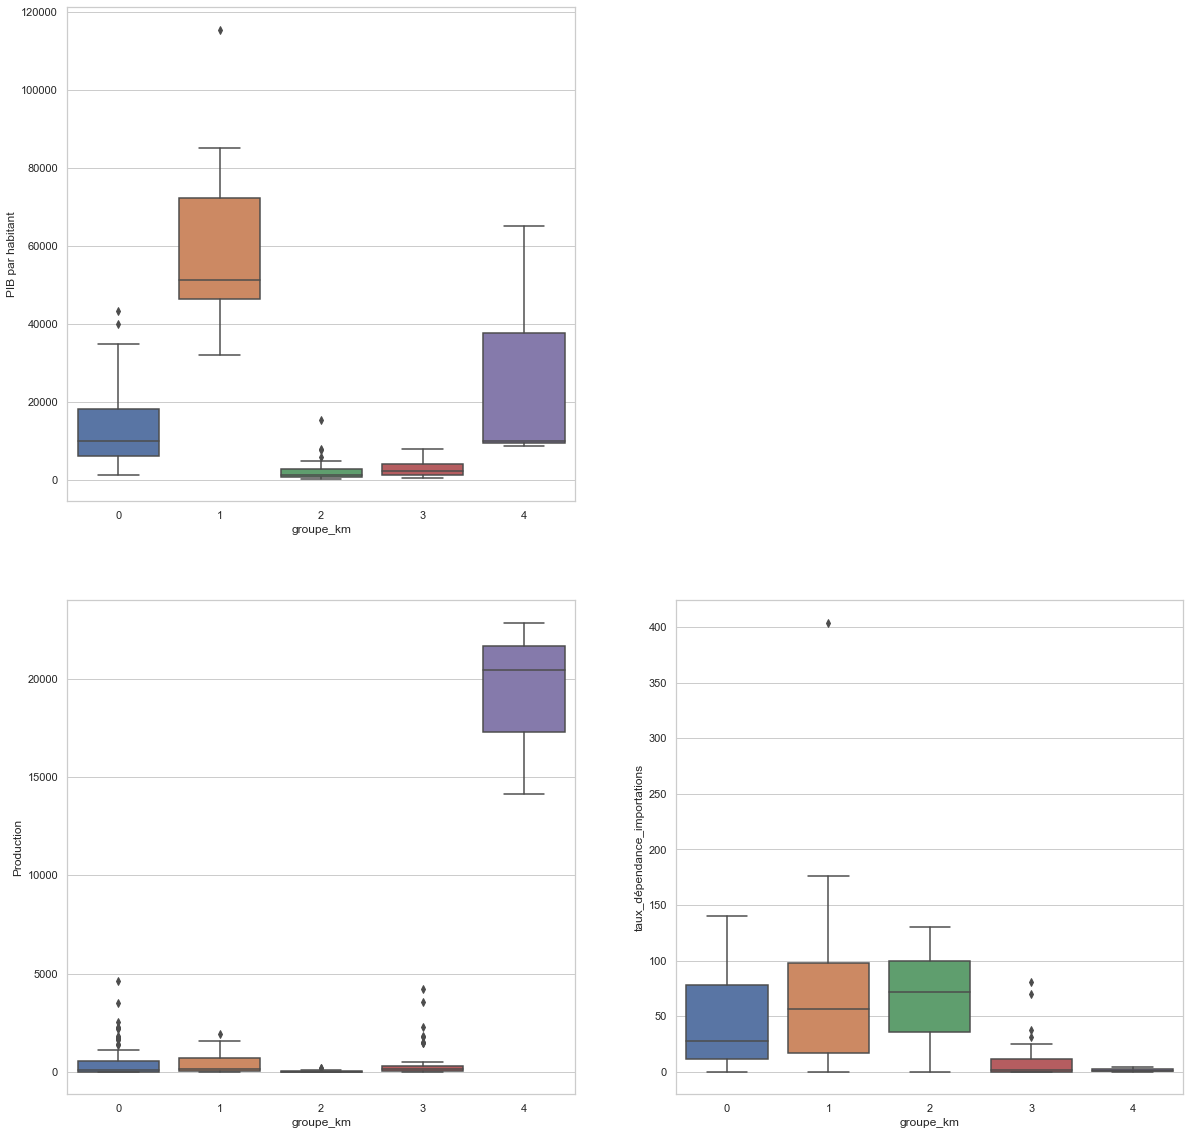

In [157]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_cls5, x='groupe_km', y='PIB par habitant')


plt.subplot(223)
sns.boxplot(data=df_cls5, x='groupe_km', y='Production')

plt.subplot(224)
sns.boxplot(data=df_cls5, x='groupe_km', y='taux_dépendance_importations')

plt.savefig("exports/boxplot_dendogramme4.png")
plt.show(block=False)





En se basant sur les mêmes critères que lors de la sélection des pays par CAH (évolution importante de la population et bilan alimentaire trop faible), les clusters Kmeans à selectionner sont  clusters0 et clusters 4

In [158]:
#Affichage des pays retenus dans ce clustering
#Sélection selon l'importance du ratio des protéines animales et dispo. calorique en réponse 
#d'une problématique ciblée sur le régime alimentaire des pays
print('groupe 1')
print('----------')
print(df_cls5[df_cls5['groupe_km'] == 0]['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')

print('groupe 2')
print('----------')
print(df_cls5[df_cls5['groupe_km'] == 1]['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')

print('groupe 3')
print('----------')
print(df_cls5[df_cls5['groupe_km'] == 2]['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')

print('groupe 4')
print('----------')
print(df_cls5[df_cls5['groupe_km'] == 3]['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')

print('groupe 5')
print('----------')
print(df_cls5[df_cls5['groupe_km'] == 4]['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')




groupe 1
----------
['Arménie' 'Albanie' 'Antigua-et-Barbuda' 'Argentine' 'Bahamas' 'Barbade'
 'Bulgarie' 'Myanmar' 'Chili' 'Colombie' 'Costa Rica' 'Cuba' 'Chypre'
 'Azerbaïdjan' 'Dominique' 'République dominicaine' 'Bélarus' 'Estonie'
 'Fidji' 'Polynésie française' 'Géorgie' 'Bosnie-Herzégovine' 'Kiribati'
 'Grèce' 'Grenade' 'Guyana' 'Hongrie' 'Croatie' 'Italie' 'Kazakhstan'
 'Jamaïque' 'Japon' 'République de Corée' 'Lettonie' 'Libye' 'Lituanie'
 'Malaisie' 'Maurice' 'Mexique' 'Mongolie' 'Maroc' 'République de Moldova'
 'Nouvelle-Calédonie' 'Macédoine du Nord' 'Nouvelle-Zélande' 'Panama'
 'Tchéquie' 'Pérou' 'Pologne' 'Portugal' 'Roumanie' 'Fédération de Russie'
 'Saint-Kitts-et-Nevis' 'Sainte-Lucie' 'Saint-Vincent-et-les Grenadines'
 'Arabie saoudite' 'Seychelles' 'Slovénie' 'Slovaquie' 'Espagne'
 'Suriname' 'République arabe syrienne' 'Turkménistan' 'Trinité-et-Tobago'
 'Tunisie' 'Turquie' 'Ukraine' 'Uruguay' 'Ouzbékistan' 'Viet Nam' 'Samoa'
 'Serbie' 'Monténégro']
------------------

In [159]:
#La correspondance avec les groupes du partitionnement hiérarchique peut-être analysée avec une méthode .crosstab()
pd.crosstab(clusters_cah, cls5.labels_)



col_0,0,1,2,3,4
row_0,,,,,
1,28,1,1,23,0
2,2,0,36,17,0
3,0,0,0,0,3
4,0,10,0,0,0
5,43,9,0,0,0


In [162]:
#Création d'un sous-ensemble avec sélection des pays des deux clusters 1 & 2 validés
df_cls_subset = df_cls5.query('[1] in groupe_km') 
df_cls_subset.shape

(20, 9)

In [163]:
#Visualisation des premières lignes de notre nouvel échantillon 
#Les correspondances des clusters sont bien intégrés…
df_cls_subset.head(28)

,Zone,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB par habitant,Production,taux_dépendance_importations,groupe_km
7,Australie,8.378,1247205.0,39398.10,67.547,54763.202388,1278.0,0.724055,1
8,Autriche,4.662,1347215.0,39766.75,59.192,49700.761833,132.0,63.841808,1
21,Canada,5.991,1291735.0,39620.75,56.306,46550.335507,1504.0,11.646064,1
36,Danemark,2.372,1248665.0,42113.70,66.493,60656.938517,158.0,97.260274,1
45,Finlande,1.713,1211800.0,42876.55,62.152,48678.365212,139.0,14.529915,1
50,Allemagne,2.886,1299035.0,38047.60,60.150,46231.563366,1544.0,48.539720,1
61,Chine - RAS de Hong-Kong,4.900,1181140.0,47249.25,74.662,49180.094302,19.0,175.681818,1
64,Islande,3.620,1327505.0,52538.10,72.690,71344.613669,10.0,18.181818,1
69,Irlande,5.787,1391015.0,40533.25,57.046,81636.578555,154.0,68.840580,1
70,Israël,10.143,1298670.0,46026.50,60.563,46376.466510,617.0,0.000000,1


In [164]:
#Visualisation des premières lignes de notre nouvel échantillon 
#Les correspondances des clusters sont bien intégrés…
df_cls_subset['Zone'].unique()

array(['Australie', 'Autriche', 'Canada', 'Danemark', 'Finlande',
       'Allemagne', 'Chine - RAS de Hong-Kong', 'Islande', 'Irlande',
       'Israël', 'Koweït', 'Chine - RAS de Macao', 'Malte', 'Pays-Bas',
       'Norvège', 'Suède', 'Suisse',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Belgique',
       'Luxembourg'], dtype=object)

Liste des pays et recommandations
Dans un premier temps, on suggère donc de cibler les pays de l'UE, pour leur proximité et la facilité des échanges commerciaux : l'Allemagne,  les Pays-Bas, la Suède ,Luxembourg et l'Italie.

Prudence avec le Royaume-Uni, puisqu'avec le Brexit, les échanges commerciaux avec l'UE sont actuellement compliqués. Pour autant, considérant les intérêts économiques mutuels, les récentes directives qui ont été prises pour favoriser ces échanges sont en notre faveur.

Dans un second temps, on pourrait également cibler les pays comme Hong Kong, le Japon, , ainsi que le Koweït et l'Arabie saoudite..

FAO - Poultry production - Marchés et commerce
https://www.fao.org/poultry-production-products/aspects-socio-economiques/marches-et-commerce/fr/

"Le Brésil est le principal exportateur de viande de volaille, suivi par les États-Unis et les Pays-Bas. Les principaux pays importateurs sont la Chine, le Japon, le Mexique et le Royaume-Uni."

"Les pays les moins avancés sont de plus en plus dépendants des importations de viande de volaille. Le niveau de leurs importations est passé de 3 pour cent en 1961 à environ 30 pour cent en 2013."

FAO - Poultry production

https://www.fao.org/poultry-production-products/production/fr/

"Les États-Unis d'Amérique sont le plus grand producteur de viande de volaille à l’échelle de la planète: ils produisent en effet 17 pour cent de la production mondiale. Viennent ensuite la Chine et le Brésil."

"Pour répondre à la demande croissante, la production de viande de volaille mondiale a bondi, passant de 9 à 132 millions de tonnes entre 1961 et 2019."

"En 2019, la viande de volaille représentait environ 39 pour cent de la production mondiale de viande."

"Dans les pays en développement, environ 80 pour cent des ménages ruraux élèvent des volailles."

# Tests statistiques
## Nos groupes sont-ils réellement distincts?
### Test d'adéquation de Kolmogorov-Smirnov :
On peut tester l’adéquation de la 'Disponibilité alimentaire de prot (g/personne/jour)' à une loi normale à l’aide de Kolmogorov-Smirnov. Le test sera doublé par celui de Shapiro-Wilk.

In [165]:
import scipy.stats as st
from scipy import stats
from scipy.stats import ks_2samp

### Vérification des hypothèses

**H0 = La variable suit donc  une loi normale .**

**H1 = La variable ne suit pas une loi normale.**

In [166]:
df_groupes_cah.head(1)

,Zone,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB par habitant,Production,taux_dépendance_importations,groupe_cah
0,Arménie,2.076,1103030.0,34415.85,56.061,4622.733216,12.0,78.181818,5


In [167]:
#Kolmogorov Smirnov test
stat, p= st.ks_2samp(df_groupes_cah['dispo_proteines'], 
            np.random.normal(df_groupes_cah['dispo_proteines'].mean(), 
                             df_groupes_cah['dispo_proteines'].std(ddof=0),
                             df_groupes_cah['dispo_proteines'].count()))

print('Statistics=%.3f, p=%.3f' % (stat, p))

#Interprétation
alpha = 0.05
if p > alpha:
    print(' Nous pouvons accepter H0 pour des niveaux de test de 5 %')
else:
    print('H0 est rejetée à un niveau de test de 5%')
    

Statistics=0.058, p=0.936
 Nous pouvons accepter H0 pour des niveaux de test de 5 %


### Test d'adéquation de Shapiro-Wilk :

*Recommandé pour tester la normalité dans le cas de petits échantillons.

In [168]:
#creation of the df with only clusters 4 & 5
c4c5 = df_groupes_cah[(df_groupes_cah['groupe_cah'] == 3) | (df_groupes_cah['groupe_cah'] == 5)]

In [169]:
#conda install -c conda-forge pingouin
#Pingouin is an open-source statistical package written in Python 3 and based mostly on Pandas and NumPy. 

In [170]:
#normality of variables in c4c5
import pingouin as pg
pg.normality(c4c5, method='shapiro', alpha=0.05).drop('groupe_cah')



,W,pval,normal
Evolution population (%),0.985948,7.662701e-01,True
dispo_calories,0.968237,1.533053e-01,True
dispo_proteines,0.977826,4.006625e-01,True
ratio_proteines_animales,0.952010,2.823269e-02,False
PIB par habitant,0.909182,5.276065e-04,False
Production,0.369831,5.441432e-14,False
taux_dépendance_importations,0.930504,3.451476e-03,False


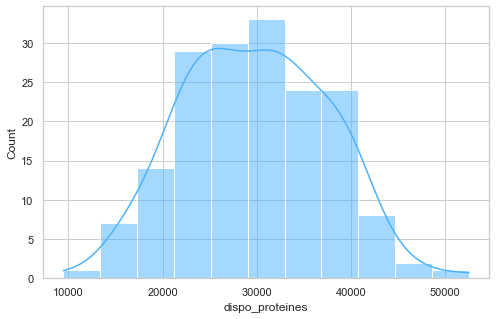

In [171]:
#histogram
sns.histplot(data=df_groupes_cah, x='dispo_proteines', kde=True, color='#4cb2ff')
plt.show()

#### Disponibilité alimentaire énergétique


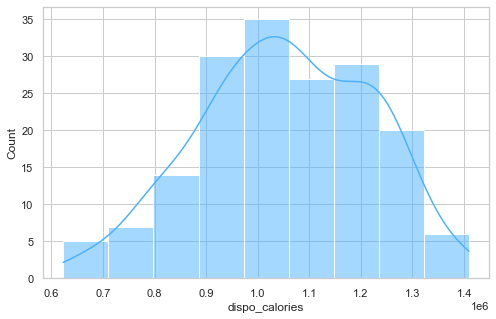

In [172]:
#histogram
sns.histplot(data=df_groupes_cah, x='dispo_calories', kde=True, color='#4cb2ff')
plt.show()

#### Importation de viande de volaille


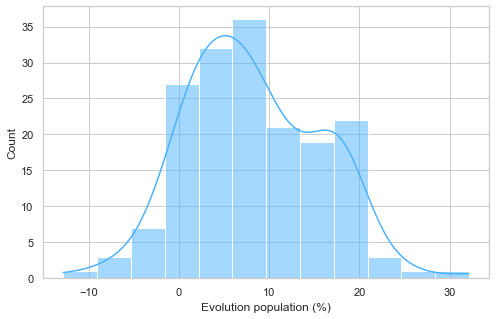

In [173]:
#histogram
sns.histplot(data=df_groupes_cah, x='Evolution population (%)', kde=True, color='#4cb2ff')
plt.show()

#### Pourcentage de protéine animale


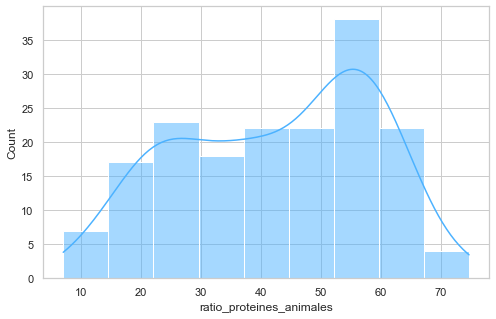

In [174]:
#histogram
sns.histplot(data=df_groupes_cah, x='ratio_proteines_animales', kde=True, color='#4cb2ff')
plt.show()

#### Produit Intérieur Brut


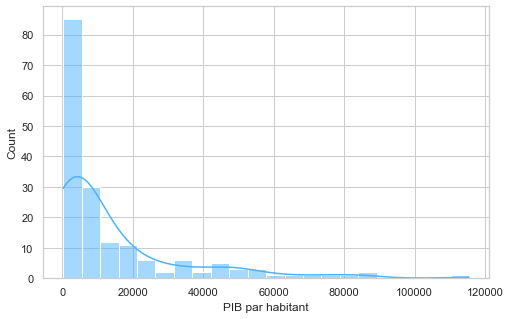

In [175]:
#histogram
sns.histplot(data=df_groupes_cah, x='PIB par habitant', kde=True, color='#4cb2ff')
plt.show()

#### Importation de viande de volaille


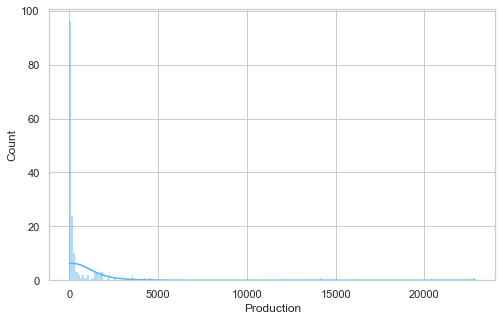

In [176]:
#histogram
sns.histplot(data=df_groupes_cah, x='Production', kde=True, color='#4cb2ff')
plt.show()


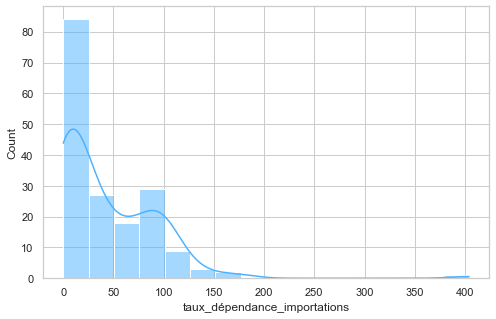

In [177]:
#histogram
sns.histplot(data=df_groupes_cah, x='taux_dépendance_importations', kde=True, color='#4cb2ff')
plt.show()

### Test de comparaison de deux clusters dans le cas gaussien.



#### La variable 'dispo_proteines' suit une loi normale et sera par conséquent choisie pour le test.

In [178]:
#On teste tout d’abord l’égalité des variances à l’aide de la commande
pg.homoscedasticity(c4c5, dv='dispo_proteines', 
                    group='groupe_cah', method='levene', 
                    alpha=0.05)

,W,pval,equal_var
levene,0.841204,0.363207,True


In [179]:
#On teste ensuite l’égalité des moyennes à l’aide de la commande
pg.ttest(df_groupes_cah['dispo_proteines'][df_groupes_cah['groupe_cah'] == 3],
         df_groupes_cah['dispo_proteines'][df_groupes_cah['groupe_cah'] == 5],
         paired=False,
        
         confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.289758,2.367614,two-sided,0.3087,"[-5673.77, 11691.59]",0.632399,0.784,0.181648


### Conclusion

In [180]:
α = 0.05

if α > pg.ttest(df_groupes_cah['dispo_proteines'][df_groupes_cah['groupe_cah'] == 3],
             df_groupes_cah['dispo_proteines'][df_groupes_cah['groupe_cah'] == 5]).iloc[0,3] : 
    
    print("La p-value étant inférieure au risque α, on rejette donc H0, les moyennes des deux groupes sont différentes.")
else :
    print("La p-value étant supérieur au risque α, H0 est donc vrai, les moyennes des deux groupes sont égales.")

La p-value étant supérieur au risque α, H0 est donc vrai, les moyennes des deux groupes sont égales.
